# Milan Airbnb dataset Exploration and Analysis

### by Alberto Carlone

As for the Udacity project "Write a Data Science Blog Post" in the Data Scientist Nanodegree, I'm going to apply the CRISP-DM process to analyze the Milan Airbnb dataset to provide insights and, if possible, a pricing model for an hypotetic new host.

In [1]:
#importing al the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

# Business Understanding

[Based on what is explained on Airbnb FAQ](https://www.airbnb.com/help/article/1857/what-is-the-airbnb-service-fee?locale=en&_set_bev_on_new_domain=1587482338_YzgwN2I3ZDZiNjA3) there are two types of fees:  
- 3% as an Host Service Fee that is deducted directly from the payout by Airbnb
- 14,2% (or less) as a Guest Service Fee that appears to guest during booking as subtotal  
  
As a Host point of view, i have to aim to a correct pricing: too high will discourage guests to book, too low will generate not enough profit.  
To achieve this, i want to know trends of pricing and booking by answering these questions:

- There is a different trend of pricing during the year according to neighbourhood? Whene are the highest price placed?
- What is the trend of reservations during the year? Undergoes changes from year to year?
- It is possible to predict the correct price considering some key features (like neighbourhood and similar)?

# Dataset Understanding and Preparation

For a complete description of the dataset we have three different data: Calendar, Listings and Reviews.

In [2]:
calendar = pd.read_csv('calendar.csv')

In [3]:
listings = pd.read_csv('listings.csv')

In [4]:
reviews = pd.read_csv('reviews.csv')

## Calendar

In [5]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,94233,2019-12-12,f,$95.00,$95.00,1.0,730.0
1,93888,2019-12-12,f,$69.00,$69.00,1.0,60.0
2,93888,2019-12-13,t,$69.00,$69.00,1.0,60.0
3,93888,2019-12-14,f,$69.00,$69.00,1.0,60.0
4,93888,2019-12-15,t,$69.00,$69.00,1.0,60.0


In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7279585 entries, 0 to 7279584
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 388.8+ MB


In [7]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price             536
adjusted_price    536
minimum_nights      6
maximum_nights      6
dtype: int64

In [8]:
calendar.groupby('listing_id').count().groupby('date').count()

,available,price,adjusted_price,minimum_nights,maximum_nights
date,,,,,
365,19919,19919,19919,19919,19919
366,25,25,25,25,25


Calendar data have 7 columns with only 2 of them with null values. Only 25 host have planned 366 days (2020 is bissextile) and we have 536 rows with null values both for price and adjused price and 6 null rows for minimum and maximum nights.

Next we'll see which rows have those null values.

In [9]:
calendar[calendar['price'].isnull()].groupby('listing_id').count()

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
24849349,189,189,0,0,189,189
33640661,5,5,0,0,5,5
36410455,171,171,0,0,171,171
36510985,171,171,0,0,171,171


In [10]:
calendar.query('price != price & listing_id == 24849349')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4273476,24849349,2019-12-12,f,NaN,NaN,2.0,1125.0
4273477,24849349,2019-12-13,f,NaN,NaN,2.0,1125.0
4273478,24849349,2019-12-14,t,NaN,NaN,2.0,1125.0
4273479,24849349,2019-12-15,t,NaN,NaN,2.0,1125.0
4273480,24849349,2019-12-16,t,NaN,NaN,2.0,1125.0
...,...,...,...,...,...,...,...
4274323,24849349,2020-06-13,t,NaN,NaN,2.0,1125.0
4274324,24849349,2020-06-14,t,NaN,NaN,2.0,1125.0
4274325,24849349,2020-06-15,t,NaN,NaN,2.0,1125.0
4274326,24849349,2020-06-16,t,NaN,NaN,2.0,1125.0


In [11]:
calendar.query('price != price & listing_id == 33640661')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
6001343,33640661,2020-12-06,t,NaN,NaN,1.0,3.0
6001344,33640661,2020-12-07,t,NaN,NaN,1.0,3.0
6001345,33640661,2020-12-08,t,NaN,NaN,1.0,3.0
6001346,33640661,2020-12-09,t,NaN,NaN,1.0,3.0
6001347,33640661,2020-12-10,t,NaN,NaN,1.0,3.0


In [12]:
calendar.query('price != price & listing_id == 36410455')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
6504628,36410455,2020-06-18,f,NaN,NaN,3.0,1125.0
6504629,36410455,2020-06-19,f,NaN,NaN,3.0,1125.0
6504630,36410455,2020-06-20,f,NaN,NaN,3.0,1125.0
6504631,36410455,2020-06-21,f,NaN,NaN,3.0,1125.0
6504632,36410455,2020-06-22,f,NaN,NaN,3.0,1125.0
...,...,...,...,...,...,...,...
6504794,36410455,2020-12-01,f,NaN,NaN,3.0,1125.0
6504795,36410455,2020-12-02,f,NaN,NaN,3.0,1125.0
6504796,36410455,2020-12-03,f,NaN,NaN,3.0,1125.0
6504797,36410455,2020-12-04,f,NaN,NaN,3.0,1125.0


In [13]:
calendar.query('price != price & listing_id == 36510985')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
6473674,36510985,2020-06-18,f,NaN,NaN,1.0,999.0
6473675,36510985,2020-06-19,f,NaN,NaN,1.0,999.0
6473676,36510985,2020-06-20,f,NaN,NaN,1.0,999.0
6473677,36510985,2020-06-21,f,NaN,NaN,1.0,999.0
6473678,36510985,2020-06-22,f,NaN,NaN,1.0,999.0
...,...,...,...,...,...,...,...
6473840,36510985,2020-12-01,f,NaN,NaN,1.0,999.0
6473841,36510985,2020-12-02,f,NaN,NaN,1.0,999.0
6473842,36510985,2020-12-03,f,NaN,NaN,1.0,999.0
6473843,36510985,2020-12-04,f,NaN,NaN,1.0,999.0


Those rows are distributed between 4 different hosts in a continuous period of time. Probably it is caused by "seasonals" hosts that offer their house half of the year (or less).

Let's look at null rows for minimum and maximum nights.

In [14]:
calendar[calendar['minimum_nights'].isnull()].groupby('listing_id').count()

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
9520279,5,5,5,5,0,0
17809437,1,1,1,1,0,0


In [15]:
calendar[calendar['maximum_nights'].isnull()].groupby('listing_id').count()

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
9520279,5,5,5,5,0,0
17809437,1,1,1,1,0,0


We can safely drop all the null rows.

In [16]:
dfcal = calendar.copy()

In [17]:
dfcal.dropna(inplace=True)
dfcal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7279043 entries, 0 to 7279584
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 444.3+ MB


In [18]:
dfcal.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [19]:
dfcal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,94233,2019-12-12,f,$95.00,$95.00,1.0,730.0
1,93888,2019-12-12,f,$69.00,$69.00,1.0,60.0
2,93888,2019-12-13,t,$69.00,$69.00,1.0,60.0
3,93888,2019-12-14,f,$69.00,$69.00,1.0,60.0
4,93888,2019-12-15,t,$69.00,$69.00,1.0,60.0


Next, we have to correct the datatype of price and adjusted_price columns. To do it, we need to remove the **$** sign and convert to float type.

In [20]:
dfcal['price'] = dfcal['price'].str.replace('$','').str.replace(',','').astype(float)
dfcal['adjusted_price'] = dfcal['adjusted_price'].str.replace('$','').str.replace(',','').astype(float)

In [21]:
dfcal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,94233,2019-12-12,f,95.0,95.0,1.0,730.0
1,93888,2019-12-12,f,69.0,69.0,1.0,60.0
2,93888,2019-12-13,t,69.0,69.0,1.0,60.0
3,93888,2019-12-14,f,69.0,69.0,1.0,60.0
4,93888,2019-12-15,t,69.0,69.0,1.0,60.0


In [22]:
dfcal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7279043 entries, 0 to 7279584
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             float64
adjusted_price    float64
minimum_nights    float64
maximum_nights    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 444.3+ MB


I don't have any information about the differences between "normal" price and adjusted price, so i should investigate it.
To do id, i'll create a column with the difference between price and adjusted_price.

In [23]:
dfcal['price-diff'] = dfcal['price']-dfcal['adjusted_price']

In [24]:
dfcal.groupby('price-diff').count().sort_values('price-diff')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
price-diff,,,,,,,
-3371.0,3,3,3,3,3,3,3
-3364.0,3,3,3,3,3,3,3
-1894.0,6,6,6,6,6,6,6
-1891.0,6,6,6,6,6,6,6
-1765.0,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...
150.0,4,4,4,4,4,4,4
162.0,3,3,3,3,3,3,3
180.0,2,2,2,2,2,2,2


In [25]:
dfcal.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights,price-diff
count,7.279043e+06,7.279043e+06,7.279043e+06,7.279043e+06,7.279043e+06,7.279043e+06
mean,2.138442e+07,1.330246e+02,1.330373e+02,3.906127e+00,3.402411e+04,-1.273766e-02
std,1.208774e+07,4.027082e+02,4.028323e+02,2.026127e+01,4.720704e+06,7.240672e+00
min,6.400000e+03,9.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-3.371000e+03
25%,1.034797e+07,5.500000e+01,5.500000e+01,1.000000e+00,2.900000e+01,0.000000e+00
50%,2.280992e+07,8.000000e+01,8.000000e+01,2.000000e+00,3.650000e+02,0.000000e+00
75%,3.280883e+07,1.290000e+02,1.290000e+02,3.000000e+00,1.125000e+03,0.000000e+00
max,4.075045e+07,1.364900e+04,1.364900e+04,1.124000e+03,6.666667e+08,4.800000e+02


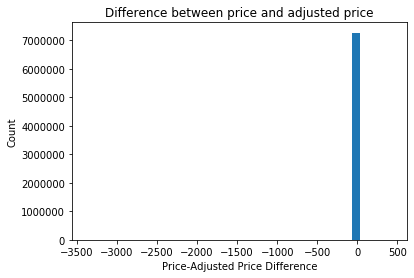

In [26]:
bins = np.arange(-3371,481,100)
plt.hist(dfcal['price-diff'], bins=bins)
plt.xlabel('Price-Adjusted Price Difference')
plt.ylabel('Count')
plt.title('Difference between price and adjusted price');

In [27]:
len(dfcal[dfcal['price-diff'] == 0])/len(dfcal)

0.9855887648967041

Since 98,5% ot the price values is equal to their adjuster counterpart (and considerind that we don't know the actual reason of this adjustement) i decided that i will keep the price_adjusted column and that the price will be dropped.

In the next step we look at the distribution of values of maximum_nights.

In [28]:
print(dfcal['maximum_nights'].mean())
print(dfcal['maximum_nights'].median())
print(dfcal['maximum_nights'].mode())

34024.106866658156
365.0
0    1125.0
dtype: float64


In [29]:
len(dfcal[dfcal['maximum_nights'] == 1125])/len(dfcal)

0.4627410498880141

In [30]:
dfcal.groupby('maximum_nights').count().sort_values(by='maximum_nights', ascending=False).head(20)

,listing_id,date,available,price,adjusted_price,minimum_nights,price-diff
maximum_nights,,,,,,,
666666666.0,365,365,365,365,365,365,365
100000.0,365,365,365,365,365,365,365
99999.0,365,365,365,365,365,365,365
20000.0,365,365,365,365,365,365,365
10000.0,730,730,730,730,730,730,730
9999.0,25,25,25,25,25,25,25
9998.0,365,365,365,365,365,365,365
5000.0,365,365,365,365,365,365,365
3000.0,365,365,365,365,365,365,365


The 46,3% of maximum_nights values is 1125. I suspect that is some sort of default value.
We also have values higher than the "defalut" and looking at those values they are for sure been entered without any actual reason/randomically by the host.

Considering that half ot the values in maximum_nights is the default value or it is a randomly entered value the column is unreliable for any analysis.

We could, anyway, look at the distribution of values lower than the default of 1125.

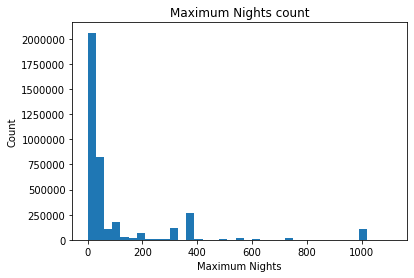

In [31]:
bins = np.arange(0,1125,30)
plt.hist(dfcal[dfcal['maximum_nights']<1125]['maximum_nights'],bins = bins)
plt.xlabel('Maximum Nights')
plt.ylabel('Count')
plt.title('Maximum Nights count');

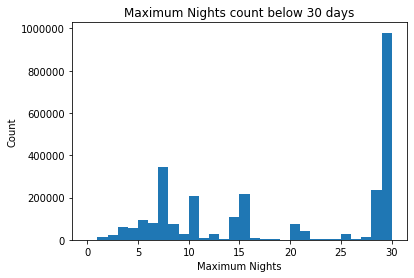

In [32]:
bins = np.arange(0,31)
plt.hist(dfcal[dfcal['maximum_nights']<1125]['maximum_nights'],bins = bins)
plt.xlabel('Maximum Nights')
plt.ylabel('Count')
plt.title('Maximum Nights count below 30 days');

The distribution is left skewed with the majority ov values under 30 days of maximum overnight stay. Restricting the distribution under 30 we see that is right skewed to 30 nights.  
In the same fashion we could look at the minimum_night column.

In [33]:
dfcal[dfcal['maximum_nights']<1125]['minimum_nights'].describe()

count    3.903771e+06
mean     3.501968e+00
std      1.730924e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.124000e+03
Name: minimum_nights, dtype: float64

In [34]:
dfcal[dfcal['maximum_nights']<1125]['minimum_nights'].quantile(0.95)

7.0

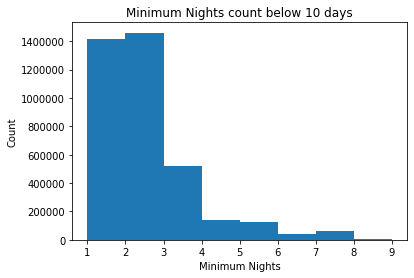

In [35]:
bins = np.arange(1,10)
plt.hist(dfcal[dfcal['maximum_nights']<1125]['minimum_nights'], bins = bins)
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.title('Minimum Nights count below 10 days');

Also minimum_nights column present a really high max value (even in the restricted dataset under 1125 maximum nights) and 95% of those values are under 10. The distribution is left skewed and the most common minimum nights is under 2.

Me can now drop unnecessary columns.

In [36]:
dfcal.drop(['price','price-diff'], axis=1, inplace=True)

In [37]:
dfcal.head()

,listing_id,date,available,adjusted_price,minimum_nights,maximum_nights
0,94233,2019-12-12,f,95.0,1.0,730.0
1,93888,2019-12-12,f,69.0,1.0,60.0
2,93888,2019-12-13,t,69.0,1.0,60.0
3,93888,2019-12-14,f,69.0,1.0,60.0
4,93888,2019-12-15,t,69.0,1.0,60.0


Next, we have to correct the datatyp of listing_id to string.

In [38]:
dfcal['listing_id'] = dfcal['listing_id'].apply(str)

In [39]:
dfcal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7279043 entries, 0 to 7279584
Data columns (total 6 columns):
listing_id        object
date              object
available         object
adjusted_price    float64
minimum_nights    float64
maximum_nights    float64
dtypes: float64(3), object(3)
memory usage: 388.7+ MB


For the sake of our next analysis i decided to split in three other columns the date (which is then converted to datetime).

In [40]:
dfcal[['year', 'month', 'day']] = dfcal['date'].str.split('-', expand=True)
dfcal['date'] = pd.to_datetime(dfcal['date'])

In [41]:
dfcal.head()

,listing_id,date,available,adjusted_price,minimum_nights,maximum_nights,year,month,day
0,94233,2019-12-12,f,95.0,1.0,730.0,2019,12,12
1,93888,2019-12-12,f,69.0,1.0,60.0,2019,12,12
2,93888,2019-12-13,t,69.0,1.0,60.0,2019,12,13
3,93888,2019-12-14,f,69.0,1.0,60.0,2019,12,14
4,93888,2019-12-15,t,69.0,1.0,60.0,2019,12,15


In [42]:
dfcal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7279043 entries, 0 to 7279584
Data columns (total 9 columns):
listing_id        object
date              datetime64[ns]
available         object
adjusted_price    float64
minimum_nights    float64
maximum_nights    float64
year              object
month             object
day               object
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 555.3+ MB


## Reviews

In [43]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558349 entries, 0 to 558348
Data columns (total 6 columns):
listing_id       558349 non-null int64
id               558349 non-null int64
date             558349 non-null object
reviewer_id      558349 non-null int64
reviewer_name    558349 non-null object
comments         558031 non-null object
dtypes: int64(3), object(3)
memory usage: 25.6+ MB


In [44]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a..."
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A..."


Reviews have 7 columns without null values except for the comments column. There are some wrong datatypes on listing_id, id and date that are going to be corrected.

Let's take a look at the null values in comments column.

In [45]:
reviews[reviews['comments'].isnull()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
66,32649,242520250,2018-03-12,48996490,Dmitry,NaN
13871,415852,198699939,2017-09-30,139602696,고운,NaN
26695,825610,339253663,2018-10-21,30786884,Nana,NaN
28366,886510,133020558,2017-02-20,88464451,Konstantin,NaN
35417,994305,423844115,2019-03-15,245616781,Kevin,NaN
...,...,...,...,...,...,...
555248,38278487,556755727,2019-10-30,203233959,Simon,NaN
555710,38453488,571378954,2019-12-01,223511086,Buga,NaN
555894,38532572,536734893,2019-09-27,295965554,Giorgia,NaN
556841,38949856,555089222,2019-10-27,302650789,Anam S.,NaN


There's is no actual reason behind the missing values other than the fact that on Airbnb it is possible to review an host without writing an actual comment.

We proceed then to the correction of the wrong datatypes.

In [46]:
dfrws = reviews.copy()

In [47]:
dfrws['listing_id'] = dfrws['listing_id'].apply(str)
dfrws['id'] = dfrws['id'].apply(str)
dfrws['reviewer_id'] = dfrws['reviewer_id'].apply(str)

In [48]:
dfrws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558349 entries, 0 to 558348
Data columns (total 6 columns):
listing_id       558349 non-null object
id               558349 non-null object
date             558349 non-null object
reviewer_id      558349 non-null object
reviewer_name    558349 non-null object
comments         558031 non-null object
dtypes: object(6)
memory usage: 25.6+ MB


Lastly, like what we did in Calendar, i want to create three columns for year, month and day for subsequent analysis.

In [49]:
dfrws[['year', 'month', 'day']] = dfrws['date'].str.split('-', expand=True)
dfrws['date'] = pd.to_datetime(dfrws['date'])

In [50]:
dfrws.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,day
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...,2010,04,19
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,2011,04,16
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,2012,04,22
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a...",2014,04,11
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A...",2014,04,14


In [51]:
dfrws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558349 entries, 0 to 558348
Data columns (total 9 columns):
listing_id       558349 non-null object
id               558349 non-null object
date             558349 non-null datetime64[ns]
reviewer_id      558349 non-null object
reviewer_name    558349 non-null object
comments         558031 non-null object
year             558349 non-null object
month            558349 non-null object
day              558349 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 38.3+ MB


## Listings

Lastly, we'll take a look to the listings dataset.

In [52]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6400,https://www.airbnb.com/rooms/6400,20191211224036,2019-12-12,The Studio Milan,"Enjoy your stay at The Studio, a light-filled ...",The two floors apartment guarantee privacy to ...,"Enjoy your stay at The Studio, a light-filled ...",none,The neighborhood is quiet and very well connec...,...,f,f,flexible_new,f,f,1,0,1,0,0.10
1,23986,https://www.airbnb.com/rooms/23986,20191211224036,2019-12-12,""" Characteristic Milanese flat""",I look forward to welcoming you in my flat; it...,In Milano : A comfortable and very quiet typic...,I look forward to welcoming you in my flat; it...,none,NaN,...,f,f,moderate_new,f,f,1,1,0,0,0.15
2,32119,https://www.airbnb.com/rooms/32119,20191211224036,2019-12-12,Nico & Cynthia's Easy Yellow Suite,NaN,Do you visit Milan for short periods (training...,Do you visit Milan for short periods (training...,none,NaN,...,f,f,moderate_new,f,f,4,4,0,0,0.13
3,32649,https://www.airbnb.com/rooms/32649,20191211224036,2019-12-12,Nico&Cinzia's Red Easy Suite!,Larger group can book Red and Pink (rooms/4653...,Do you visit Milan for short periods (training...,Larger group can book Red and Pink (rooms/ (Ph...,none,"Flat It's located in north side of milan, jus...",...,f,f,moderate_new,f,f,4,4,0,0,0.25
4,37256,https://www.airbnb.com/rooms/37256,20191211224036,2019-12-12,COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER,"COZY, FULLY FURNISHED, PRIVATE STUDIO IN THE C...",Beautiful Elegant fully furnished Studio in th...,"COZY, FULLY FURNISHED, PRIVATE STUDIO IN THE C...",none,"Best area of Milan, at walking distance from t...",...,t,f,strict_new,f,f,2,1,1,0,0.31


In [53]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19944 entries, 0 to 19943
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 16.1+ MB


In [54]:
listings.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [55]:
for n in listings.columns.tolist():
    print(n)
    print(listings[n].isnull().sum())

id
0
listing_url
0
scrape_id
0
last_scraped
0
name
13
summary
655
space
5341
description
288
experiences_offered
0
neighborhood_overview
6809
notes
11530
transit
6648
access
9782
interaction
7933
house_rules
8779
thumbnail_url
19944
medium_url
19944
picture_url
0
xl_picture_url
19944
host_id
0
host_url
0
host_name
36
host_since
36
host_location
80
host_about
8282
host_response_time
4822
host_response_rate
4822
host_acceptance_rate
19944
host_is_superhost
36
host_thumbnail_url
36
host_picture_url
36
host_neighbourhood
3157
host_listings_count
36
host_total_listings_count
36
host_verifications
0
host_has_profile_pic
36
host_identity_verified
36
street
0
neighbourhood
34
neighbourhood_cleansed
0
neighbourhood_group_cleansed
19944
city
5
state
473
zipcode
325
market
10
smart_location
0
country_code
0
country
0
latitude
0
longitude
0
is_location_exact
0
property_type
0
room_type
0
accommodates
0
bathrooms
13
bedrooms
25
beds
27
bed_type
0
amenities
0
square_feet
19620
price
0
weekly_price
1

This is the most various (in terms of different columns) of the three dataset. We have many columns with null values but not every one is needed for aur analysis.  
For this reason, we are going to drop every unneded column first.

In [56]:
dflst = listings.copy()

In [57]:
dflst_drop = [
'listing_url',
'scrape_id',
'last_scraped',
'summary',
'space',
'description',
'experiences_offered',
'neighborhood_overview',
'notes',
'transit',
'access',
'interaction',
'house_rules',
'thumbnail_url',
'medium_url',
'picture_url',
'xl_picture_url',
'host_id',
'host_url',
'host_since',
'host_location',
'host_about',
'host_response_time',
'host_response_rate', 
'host_acceptance_rate',
'host_thumbnail_url',
'host_picture_url',
'host_neighbourhood', 
'host_verifications',
'host_has_profile_pic', 
'host_identity_verified',
'street',
'neighbourhood_cleansed', 
'neighbourhood_group_cleansed',
'is_location_exact',
'security_deposit',
'calendar_updated',
'has_availability',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'calendar_last_scraped',
'number_of_reviews_ltm',
'first_review',
'last_review',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'requires_license',
'license',
'jurisdiction_names',
'is_business_travel_ready',
'cancellation_policy',
'require_guest_profile_picture',
'require_guest_phone_verification',
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms',
'square_feet',
'weekly_price',
'monthly_price',
'market',
'reviews_per_month',
'city',
'state',
'host_listings_count',
'host_total_listings_count',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'maximum_nights_avg_ntm',
'smart_location',
'country_code',
'country',
'latitude',
'longitude']

In [58]:
dflst.drop(dflst_drop, axis=1, inplace=True)

In [59]:
for n in dflst.columns.tolist():
    print(n)
    print(dflst[n].isnull().sum())

id
0
name
13
host_name
36
host_is_superhost
36
neighbourhood
34
zipcode
325
property_type
0
room_type
0
accommodates
0
bathrooms
13
bedrooms
25
beds
27
bed_type
0
amenities
0
price
0
cleaning_fee
3859
guests_included
0
extra_people
0
minimum_nights
0
maximum_nights
0
number_of_reviews
0
review_scores_rating
4515
instant_bookable
0


The first thing i want to correct is related to neighbourhood and zipcode columns. The city of Milan is divided in 9 zones (Zona, in italian): Zona 1 is the historic center and the other eight are all around the center.  
For the sake of future analysis, i want to regroup every neighbourhood under the correct zone.

In [60]:
dflst.groupby('neighbourhood').count()

,id,name,host_name,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Affori,66,66,66,66,63,66,66,66,66,66,...,66,66,61,66,66,66,66,66,48,66
Baggio,24,24,24,24,24,24,24,24,24,24,...,24,24,16,24,24,24,24,24,22,24
Barona,158,158,156,156,158,158,158,158,158,157,...,158,158,125,158,158,158,158,158,132,158
Bovisa,266,266,266,266,261,266,266,266,266,265,...,266,266,212,266,266,266,266,266,193,266
Bovisasca,2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,2,2,2,2,2
Brera,98,98,98,98,97,98,98,98,98,98,...,98,98,86,98,98,98,98,98,79,98
Bruzzano,16,16,16,16,16,16,16,16,16,16,...,16,16,14,16,16,16,16,16,15,16
Calvairate,142,142,141,141,139,142,142,142,142,142,...,142,142,111,142,142,142,142,142,112,142
Centro Direzionale,502,502,501,501,496,502,502,502,501,501,...,502,502,422,502,502,502,502,502,401,502


For the first part of this correction, i manually assign zones by locating geographically every non-Zona in the column: for example Brera, Chinatown and Centro Storico are all in Zona 1.

In [61]:
dflst.replace(['Brera', 'Chinatown', 'Centro Storico'], 'Zona 1', inplace=True)
dflst.replace(['Città Studi'], 'Zona 3', inplace=True)
dflst.replace(['Porta Romana', 'Porta Vittoria', 'Calvairate'], 'Zona 4', inplace=True)
dflst.replace(['Barona', 'Navigli'], 'Zona 6', inplace=True)
dflst.replace(['Baggio'], 'Zona 7', inplace=True)
dflst.replace(['Affori', 'Bovisa', 'Bovisasca', 'Bruzzano', 'Centro Direzionale', 'Comasina'], 'Zona 9', inplace=True)

In [62]:
dflst.groupby('neighbourhood').count()

,id,name,host_name,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Zona 1,3867,3866,3860,3860,3807,3867,3867,3867,3866,3862,...,3867,3867,3205,3867,3867,3867,3867,3867,2998,3867
Zona 2,2125,2125,2123,2123,2103,2125,2125,2125,2125,2123,...,2125,2125,1735,2125,2125,2125,2125,2125,1685,2125
Zona 3,2598,2594,2593,2593,2547,2598,2598,2598,2596,2596,...,2598,2598,2055,2598,2598,2598,2598,2598,2033,2598
Zona 4,2014,2014,2006,2006,1984,2014,2014,2014,2014,2012,...,2014,2014,1607,2014,2014,2014,2014,2014,1532,2014
Zona 5,1715,1713,1711,1711,1693,1715,1715,1715,1713,1712,...,1715,1715,1339,1715,1715,1715,1715,1715,1296,1715
Zona 6,2505,2503,2500,2500,2465,2505,2505,2505,2502,2499,...,2505,2505,1993,2505,2505,2505,2505,2505,1900,2505
Zona 7,1242,1242,1241,1241,1211,1242,1242,1242,1241,1242,...,1242,1242,988,1242,1242,1242,1242,1242,991,1242
Zona 8,1636,1634,1633,1633,1609,1636,1636,1636,1635,1634,...,1636,1636,1363,1636,1636,1636,1636,1636,1277,1636
Zona 9,2208,2206,2207,2207,2167,2208,2208,2208,2205,2205,...,2208,2208,1780,2208,2208,2208,2208,2208,1714,2208


Then to fill the last null values, i want to manually find the zone looking at the zipcode.

In [63]:
dflst[dflst['neighbourhood'].isnull()].groupby('zipcode').count()

,id,name,host_name,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
zipcode,,,,,,,,,,,,,,,,,,,,,
20121,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
20123,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
20124,6,6,6,6,0,6,6,6,6,6,...,6,6,4,6,6,6,6,6,0,6
20125,9,9,9,9,0,9,9,9,9,9,...,9,9,3,9,9,9,9,9,0,9
20131,1,1,1,1,0,1,1,1,1,1,...,1,1,0,1,1,1,1,1,0,1
20133,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
20134,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
20137,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
20139,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1


In [64]:
zipcode_idx = dflst[dflst['neighbourhood'].isnull()]['zipcode'].index.tolist()

In [65]:
for idx in zipcode_idx:
    if dflst['zipcode'][idx] in ["20121","20123","20154"]:
        dflst.at[idx, 'neighbourhood'] = 'Zona 1'
    elif dflst['zipcode'][idx] in ["20124","20125"]:
        dflst.at[idx, 'neighbourhood'] = 'Zona 2'
    elif dflst['zipcode'][idx] in ["20131","20133","20134"]:
        dflst.at[idx, 'neighbourhood'] = 'Zona 3'
    elif dflst['zipcode'][idx] in ["20137"]:
        dflst.at[idx, 'neighbourhood'] = 'Zona 4'
    elif dflst['zipcode'][idx] in ["20139","20141"]:
        dflst.at[idx, 'neighbourhood'] = 'Zona 5'
    elif dflst['zipcode'][idx] in ["20142"]:
        dflst.at[idx, 'neighbourhood'] = 'Zona 6'
    elif dflst['zipcode'][idx] in ["20146","20153"]:
        dflst.at[idx, 'neighbourhood'] = 'Zona 7'
    elif dflst['zipcode'][idx] in ["20158","20159"]:
        dflst.at[idx, 'neighbourhood'] = 'Zona 9'
    else:
        dflst.at[idx, 'neighbourhood'] = 'Zona 1'

In [66]:
dflst['neighbourhood'].isnull().sum()

0

In [67]:
dflst.groupby('neighbourhood').count()

,id,name,host_name,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Zona 1,3871,3870,3864,3864,3810,3871,3871,3871,3870,3866,...,3871,3871,3207,3871,3871,3871,3871,3871,2998,3871
Zona 2,2140,2140,2138,2138,2118,2140,2140,2140,2140,2138,...,2140,2140,1742,2140,2140,2140,2140,2140,1685,2140
Zona 3,2601,2597,2596,2596,2550,2601,2601,2601,2599,2599,...,2601,2601,2057,2601,2601,2601,2601,2601,2033,2601
Zona 4,2015,2015,2007,2007,1985,2015,2015,2015,2015,2013,...,2015,2015,1608,2015,2015,2015,2015,2015,1532,2015
Zona 5,1718,1716,1714,1714,1696,1718,1718,1718,1716,1715,...,1718,1718,1341,1718,1718,1718,1718,1718,1296,1718
Zona 6,2506,2504,2501,2501,2466,2506,2506,2506,2503,2500,...,2506,2506,1994,2506,2506,2506,2506,2506,1900,2506
Zona 7,1247,1247,1246,1246,1216,1247,1247,1247,1246,1247,...,1247,1247,992,1247,1247,1247,1247,1247,994,1247
Zona 8,1636,1634,1633,1633,1609,1636,1636,1636,1635,1634,...,1636,1636,1363,1636,1636,1636,1636,1636,1277,1636
Zona 9,2210,2208,2209,2209,2169,2210,2210,2210,2207,2207,...,2210,2210,1781,2210,2210,2210,2210,2210,1714,2210


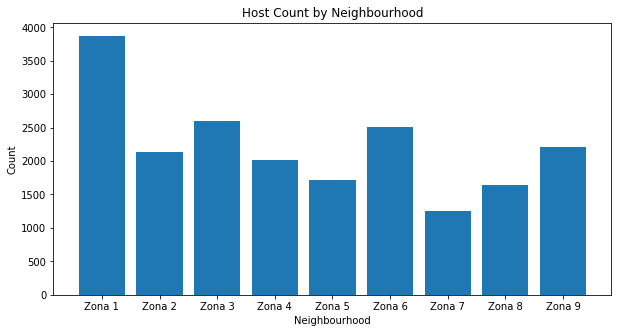

In [68]:
plt.figure(figsize=(10,5))
plt.bar(dflst.groupby('neighbourhood').count().index,dflst.groupby('neighbourhood').count()['id'].values)
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Host Count by Neighbourhood');

Zona 1 is the most present in the dataset and is not a surprise because is the historic center of the city.

Next one is cleaning_fee column which present 3859 null values.

In [69]:
dflst[dflst['cleaning_fee'].isnull()]

,id,name,host_name,host_is_superhost,neighbourhood,zipcode,property_type,room_type,accommodates,bathrooms,...,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
3,32649,Nico&Cinzia's Red Easy Suite!,Nico&Cinzia,f,Zona 2,20126,Apartment,Entire home/apt,4,1.0,...,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",$70.00,NaN,2,$5.00,3,730,29,96.0,f
6,42732,"Navigli near down town, linked Expo",Francesco,f,Zona 1,20144,Apartment,Entire home/apt,4,1.0,...,"{TV,Wifi,""Wheelchair accessible"",Kitchen,Doorm...",$290.00,NaN,1,$0.00,2,30,14,81.0,f
8,52181,Nico House,Daniele Nicola,f,Zona 7,20153,Apartment,Entire home/apt,3,2.0,...,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",$60.00,NaN,1,$0.00,4,30,0,NaN,t
12,70591,Chiara & Mesopotamia: Charmy & Lightly home,Chiara,f,Zona 8,20154,Apartment,Private room,2,1.0,...,"{Wifi,""Air conditioning"",Kitchen,Elevator,""Buz...",$50.00,NaN,1,$20.00,1,6,180,97.0,f
14,74835,Amazin attic in front of the castle,Augusto,f,Zona 1,20121,Apartment,Entire home/apt,2,1.0,...,"{Internet,Wifi,""Air conditioning"",Kitchen,Door...",$280.00,NaN,1,$0.00,7,16,3,100.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19938,40747917,Single bed +WiFi in CENTRAL STATION Milano,Marco,f,Zona 2,20125,Apartment,Shared room,4,1.0,...,"{Wifi,""Smoking allowed"",Heating,""First aid kit...",$21.00,NaN,1,$0.00,1,1125,0,NaN,t
19939,40748756,Single bed #2 +WiFi in CENTRAL STATION Milano,Marco,f,Zona 2,20125,Apartment,Shared room,4,1.0,...,"{Wifi,""Smoking allowed"",Heating,""First aid kit...",$21.00,NaN,1,$0.00,1,1125,0,NaN,t
19940,40749095,Single bed #3 +WiFi in CENTRAL STATION Milano,Marco,f,Zona 2,20125,Apartment,Shared room,4,1.0,...,"{Wifi,""Smoking allowed"",Heating,""First aid kit...",$21.00,NaN,1,$0.00,1,1125,0,NaN,t
19941,40749412,Single bed #4 +WiFi in CENTRAL STATION Milano,Marco,f,Zona 2,20125,Apartment,Shared room,4,1.0,...,"{Wifi,""Smoking allowed"",Heating,""First aid kit...",$21.00,NaN,1,$0.00,1,1125,0,NaN,t


After looking directly at profiles of some of those hosts (and a direct question to an Airbnb host that i know) it emerged that the cleaning fee, if not present, it is equal to zero. For this reason, i can fill it with **$0.00** (i fill it with a string value and converted it to float in a subsequent step).

In [70]:
dflst['cleaning_fee'].fillna('$0.00', inplace=True)
dflst['cleaning_fee'].isnull().sum()

0

Let's look now at review_scores_rating column.

In [71]:
dflst['review_scores_rating'].isnull().sum()

4515

The fast route is to fill null values with the mean but, just to be sure, i want to look at the mean rating for each zone.

In [72]:
dflst.groupby('neighbourhood')['review_scores_rating'].mean()

neighbourhood
Zona 1    92.849566
Zona 2    93.110386
Zona 3    93.680275
Zona 4    93.810705
Zona 5    93.126543
Zona 6    93.761579
Zona 7    93.414487
Zona 8    93.789350
Zona 9    92.836056
Name: review_scores_rating, dtype: float64

In [73]:
dflst['review_scores_rating'].mean()

93.33119450385638

Each mean score is around 93 for zones and also for the entire dataset.

I'd like to see, for each zone, the distribution of review scores.

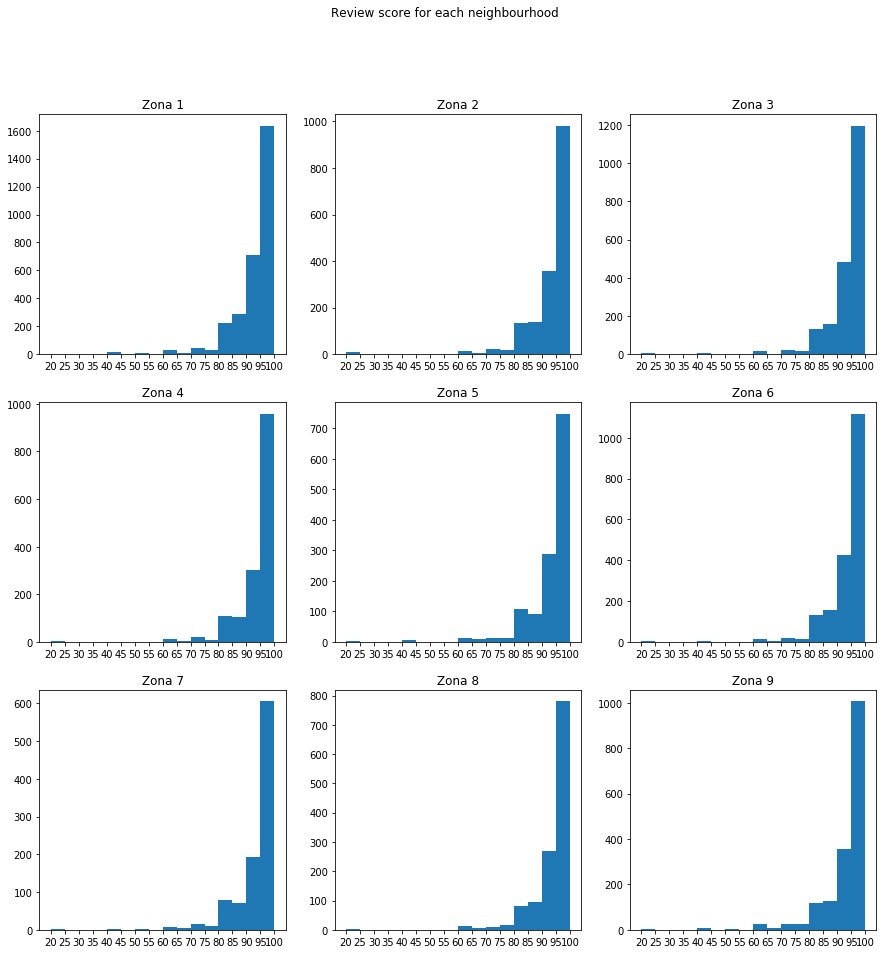

In [74]:
bins = np.arange(20,101,5)


plt.figure(figsize=(15,15))
plt.suptitle('Review score for each neighbourhood')

plt.subplot(3,3,1)
plt.hist(dflst[dflst['neighbourhood'] == 'Zona 1']['review_scores_rating'], bins = bins)
plt.xticks(bins)
plt.title('Zona 1')

plt.subplot(3,3,2)
plt.hist(dflst[dflst['neighbourhood'] == 'Zona 2']['review_scores_rating'], bins = bins)
plt.xticks(bins)
plt.title('Zona 2')

plt.subplot(3,3,3)
plt.hist(dflst[dflst['neighbourhood'] == 'Zona 3']['review_scores_rating'], bins = bins)
plt.xticks(bins)
plt.title('Zona 3')

plt.subplot(3,3,4)
plt.hist(dflst[dflst['neighbourhood'] == 'Zona 4']['review_scores_rating'], bins = bins)
plt.xticks(bins)
plt.title('Zona 4')

plt.subplot(3,3,5)
plt.hist(dflst[dflst['neighbourhood'] == 'Zona 5']['review_scores_rating'], bins = bins)
plt.xticks(bins)
plt.title('Zona 5')

plt.subplot(3,3,6)
plt.hist(dflst[dflst['neighbourhood'] == 'Zona 6']['review_scores_rating'], bins = bins)
plt.xticks(bins)
plt.title('Zona 6')

plt.subplot(3,3,7)
plt.hist(dflst[dflst['neighbourhood'] == 'Zona 7']['review_scores_rating'], bins = bins)
plt.xticks(bins)
plt.title('Zona 7')

plt.subplot(3,3,8)
plt.hist(dflst[dflst['neighbourhood'] == 'Zona 8']['review_scores_rating'], bins = bins)
plt.xticks(bins)
plt.title('Zona 8')

plt.subplot(3,3,9)
plt.hist(dflst[dflst['neighbourhood'] == 'Zona 9']['review_scores_rating'], bins = bins)
plt.xticks(bins)
plt.title('Zona 9');

In every zone the majority of thos scores falls in the interval between 90 and 100. For this reason and for the evidence in the previous step i can fill every null value with the mean (rounded to unity).

In [75]:
dflst['review_scores_rating'].fillna(round(dflst['review_scores_rating'].mean(),0), inplace=True)

To fill the missing values in name column, i opted to combine the host name to the word House.

In [76]:
dflst[dflst['name'].isnull()]

,id,name,host_name,host_is_superhost,neighbourhood,zipcode,property_type,room_type,accommodates,bathrooms,...,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
2659,5507787,NaN,Lamari,f,Zona 6,20143,Apartment,Entire home/apt,2,1.0,...,"{TV,""Air conditioning"",Kitchen,""Smoking allowe...",$230.00,$0.00,1,$0.00,1,1125,0,93.0,f
2762,5617538,NaN,Pierangela,f,Zona 3,20131,Apartment,Shared room,1,1.0,...,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,Essen...",$25.00,$0.00,1,$0.00,1,1125,6,100.0,f
3334,6038986,NaN,Maurizio,f,Zona 8,20156,Apartment,Entire home/apt,4,1.0,...,"{TV,Wifi,Kitchen,""Smoking allowed"",""Pets allow...",$130.00,$0.00,1,$0.00,1,1125,0,93.0,f
3629,6352743,NaN,Mat,f,Zona 5,20141,Condominium,Entire home/apt,4,1.0,...,"{TV,Internet,Wifi,Kitchen,""Pets allowed"",Eleva...",$50.00,$0.00,1,$0.00,12,14,0,93.0,f
3780,6558418,NaN,Stefano,f,Zona 8,20156,Loft,Entire home/apt,3,1.0,...,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$58.00,$30.00,1,$0.00,3,1125,0,93.0,f
3952,6840522,NaN,Fan,f,Zona 9,20159,Apartment,Entire home/apt,2,1.0,...,"{Internet,Wifi,Kitchen,""Smoking allowed"",""Pets...",$65.00,$10.00,1,$0.00,1,1125,2,93.0,t
4015,6962365,NaN,Cristina,f,Zona 5,20136,Apartment,Entire home/apt,3,1.0,...,"{TV,Wifi,Kitchen,Doorman,Elevator,Washer,""Carb...",$60.00,$20.00,1,$0.00,5,1125,0,93.0,f
4085,7140881,NaN,Alice,t,Zona 3,20131,Apartment,Private room,2,2.0,...,"{Internet,Wifi,Kitchen,Breakfast,""Pets live on...",$60.00,$20.00,1,$0.00,2,40,52,93.0,f
4670,9007188,NaN,Alessandro,f,Zona 9,20159,Apartment,Private room,2,1.0,...,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,Essen...",$90.00,$0.00,1,$0.00,1,1125,1,100.0,f
5730,12269200,NaN,Alberta,f,Zona 3,20133,Apartment,Entire home/apt,3,1.0,...,"{TV,Kitchen,Heating,""Hair dryer""}",$300.00,$0.00,1,$50.00,1,1125,0,93.0,f


In [77]:
names_idx = dflst[dflst['name'].isnull()].index.tolist()

for idx in names_idx:
    dflst.at[idx, 'name'] = dflst.host_name[idx]+"\'s House"

I considered every null value in host_is_superhost as False, thus assigning the value **f**.

In [78]:
dflst['host_is_superhost'].fillna('f', inplace=True)

In [79]:
dflst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19944 entries, 0 to 19943
Data columns (total 23 columns):
id                      19944 non-null int64
name                    19944 non-null object
host_name               19908 non-null object
host_is_superhost       19944 non-null object
neighbourhood           19944 non-null object
zipcode                 19619 non-null object
property_type           19944 non-null object
room_type               19944 non-null object
accommodates            19944 non-null int64
bathrooms               19931 non-null float64
bedrooms                19919 non-null float64
beds                    19917 non-null float64
bed_type                19944 non-null object
amenities               19944 non-null object
price                   19944 non-null object
cleaning_fee            19944 non-null object
guests_included         19944 non-null int64
extra_people            19944 non-null object
minimum_nights          19944 non-null int64
maximum_nights    

Next, we look at the bathrooms column to decide how ti fill missing values.

In [80]:
dflst[dflst['bathrooms'].isnull()].iloc[:,9:15]

,bathrooms,bedrooms,beds,bed_type,amenities,price
66,NaN,1.0,1.0,Real Bed,"{TV,""Air conditioning"",Kitchen,""Washer / Dryer...",$40.00
272,NaN,1.0,1.0,Real Bed,{Breakfast},$300.00
350,NaN,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Smoking allowed"",Eleva...",$38.00
533,NaN,1.0,NaN,Real Bed,{},$150.00
542,NaN,1.0,1.0,Real Bed,{},$80.00
593,NaN,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Doorman,Breakfast,Hea...",$100.00
606,NaN,2.0,NaN,Real Bed,{},$600.00
614,NaN,1.0,1.0,Real Bed,"{""Cable TV"",Wifi,""Air conditioning"",Breakfast,...",$91.00
711,NaN,1.0,NaN,Real Bed,{},$76.00
2321,NaN,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$199.00


I opted for a fill with the median value.

In [81]:
dflst['bathrooms'].median()

1.0

In [82]:
dflst['bathrooms'].fillna(dflst['bathrooms'].median(), inplace=True)

In the same fashion i want to look to the bedrooms and, consequentially, the number of beds.

In [83]:
dflst[dflst['bedrooms'].isnull()].iloc[:,9:15]

,bathrooms,bedrooms,beds,bed_type,amenities,price
758,1.0,NaN,1.0,Real Bed,"{TV,Wifi,""Wheelchair accessible"",Kitchen,""Smok...",$28.00
891,1.0,NaN,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Smoking allowed"",""P...",$60.00
937,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Doorman,Elevator,""...",$75.00
3731,1.0,NaN,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Pets allowed"",Doorm...",$59.00
5666,1.0,NaN,1.0,Pull-out Sofa,"{TV,Wifi,Kitchen,""Smoking allowed"",Doorman,Ele...",$100.00
5727,1.0,NaN,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$42.00
12815,1.0,NaN,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",$70.00
13989,1.0,NaN,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",$39.00
14563,1.0,NaN,2.0,Real Bed,"{TV,Wifi,Kitchen,""Smoking allowed"",Heating,Was...",$140.00
14618,1.0,NaN,2.0,Real Bed,"{Heating,Essentials,""Private entrance""}",$100.00


In [84]:
dflst['bedrooms'].value_counts()

1.0     14467
2.0      3179
0.0      1579
3.0       531
4.0       129
5.0        23
6.0         4
7.0         3
8.0         2
20.0        1
16.0        1
Name: bedrooms, dtype: int64

Like we did for the bathrooms, we fill bedrooms with the median.

In [85]:
dflst['bedrooms'].fillna(dflst['bedrooms'].median(), inplace=True)

To fill the number of beds i want to be more specific, basing the filled balue to the number of bedrooms in a house. For example, besides rare case where there isn't a real bed, it is always true that you can't have less beds than bedrooms so filling it with median (or something else) can cause misleading information.

In [86]:
dflst[dflst['beds'].isnull()].iloc[:,9:15]

,bathrooms,bedrooms,beds,bed_type,amenities,price
204,1.0,1.0,NaN,Real Bed,"{""Dishes and silverware""}",$50.00
533,1.0,1.0,NaN,Real Bed,{},$150.00
606,1.0,2.0,NaN,Real Bed,{},$600.00
711,1.0,1.0,NaN,Real Bed,{},$76.00
3342,1.0,1.0,NaN,Real Bed,"{TV,Kitchen,""Smoking allowed"",""Pets allowed"",H...",$50.00
5913,1.0,1.0,NaN,Real Bed,"{Internet,Wifi,Kitchen,""Smoking allowed"",Doorm...",$23.00
14029,1.0,1.0,NaN,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$70.00
14411,1.0,1.0,NaN,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",$150.00
16539,1.0,1.0,NaN,Real Bed,"{TV,""Air conditioning"",Kitchen,Elevator,Essent...",$500.00
17262,1.0,1.0,NaN,Real Bed,"{TV,""Air conditioning"",Kitchen,Heating,Washer,...",$60.00


In [87]:
dflst[dflst['bedrooms']<3].groupby(['bedrooms','beds']).count()

id  name  host_name  host_is_superhost  neighbourhood  \
bedrooms beds                                                            
0.0      0.0     56    56         56                 56             56   
         1.0   1033  1033       1030               1033           1033   
         2.0    420   420        419                420            420   
         3.0     60    60         60                 60             60   
         4.0      9     9          9                  9              9   
         6.0      1     1          1                  1              1   
1.0      0.0    253   253        253                253            253   
         1.0   8133  8133       8114               8133           8133   
         2.0   4881  4881       4873               4881           4881   
         3.0    823   823        822                823            823   
         4.0    293   293        291                293            293   
         5.0     55    55         55                 55             55   
         6.0     20    20         20                 20             20   
         7.0      2     2          2                  2              2   
         8.0      4     4          4                  4              4   
         11.0     1     1          1                  1              1   
         12.0     1     1          1                  1              1   
         15.0     1     1          1                  1              1   
         16.0     1     1          1                  1              1   
2.0      0.0     23    23         23                 23             23   
         1.0    136   136        136                136            136   
         2.0   1316  1316       1316               1316           1316   
         3.0    965   965        964                965            965   
         4.0    509   509        509                509            509   
         5.0    152   152        152                152            152   
         6.0     61    61         61                 61             61   
         7.0      7     7          7                  7              7   
         8.0      7     7          7                  7              7   

               zipcode  property_type  room_type  accommodates  bathrooms  \
bedrooms beds                                                               
0.0      0.0        56             56         56            56         56   
         1.0      1012           1033       1033          1033       1033   
         2.0       416            420        420           420        420   
         3.0        60             60         60            60         60   
         4.0         8              9          9             9          9   
         6.0         1              1          1             1          1   
1.0      0.0       251            253        253           253        253   
         1.0      7982           8133       8133          8133       8133   
         2.0      4817           4881       4881          4881       4881   
         3.0       816            823        823           823        823   
         4.0       289            293        293           293        293   
         5.0        54             55         55            55         55   
         6.0        15             20         20            20         20   
         7.0         2              2          2             2          2   
         8.0         2              4          4             4          4   
         11.0        1              1          1             1          1   
         12.0        1              1          1             1          1   
         15.0        1              1          1             1          1   
         16.0        1              1          1             1          1   
2.0      0.0        22             23         23            23         23   
         1.0       129            136        136           136        136   
         2.0      1296   

We can see that the most common value of beds coincides with the number of bedrooms (i.e. one bed per bedroom) so we can proceed to fill those null values with their respective mode.

In [88]:
dflst[dflst['bedrooms'] == 1]['beds'].mode()

0    1.0
dtype: float64

In [89]:
dflst[dflst['bedrooms'] == 2]['beds'].mode()

0    2.0
dtype: float64

In [90]:
beds_idx = dflst[dflst['beds'].isnull()].index.tolist()

for idx in beds_idx:
    if dflst['bedrooms'][idx] == 1:
        dflst.at[idx, 'beds'] = dflst[dflst['bedrooms'] == 1]['beds'].mode()
    elif dflst['bedrooms'][idx] == 2:
        dflst.at[idx, 'beds'] = dflst[dflst['bedrooms'] == 2]['beds'].mode()

In [91]:
dflst['beds'].isnull().sum()

0

Since we can't fill the missing host_name column and the zipcode values are not needed anymore (since we can refer to the neighbourhood column) we can drop them for good.

In [92]:
dflst.drop(['host_name','zipcode'], axis=1, inplace=True)

In [93]:
dflst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19944 entries, 0 to 19943
Data columns (total 21 columns):
id                      19944 non-null int64
name                    19944 non-null object
host_is_superhost       19944 non-null object
neighbourhood           19944 non-null object
property_type           19944 non-null object
room_type               19944 non-null object
accommodates            19944 non-null int64
bathrooms               19944 non-null float64
bedrooms                19944 non-null float64
beds                    19944 non-null float64
bed_type                19944 non-null object
amenities               19944 non-null object
price                   19944 non-null object
cleaning_fee            19944 non-null object
guests_included         19944 non-null int64
extra_people            19944 non-null object
minimum_nights          19944 non-null int64
maximum_nights          19944 non-null int64
number_of_reviews       19944 non-null int64
review_scores_rating

Lastly, we have to correct the datatypes of host_is_superhost, id, price, cleaning_fee, extra_people and instant bookable columns.

In [94]:
dflst.head().iloc[:,0:5]

,id,name,host_is_superhost,neighbourhood,property_type
0,6400,The Studio Milan,f,Zona 5,Apartment
1,23986,""" Characteristic Milanese flat""",f,Zona 6,Apartment
2,32119,Nico & Cynthia's Easy Yellow Suite,f,Zona 2,Apartment
3,32649,Nico&Cinzia's Red Easy Suite!,f,Zona 2,Apartment
4,37256,COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER,t,Zona 1,Apartment


In [95]:
for n in range(len(dflst)):
    if dflst['host_is_superhost'][n] == 'f':
        dflst.at[n, 'host_is_superhost'] = 0
    else:
        dflst.at[n, 'host_is_superhost'] = 1
dflst['host_is_superhost'] = dflst['host_is_superhost'].apply(int)

In [96]:
dflst['id'] = dflst['id'].apply(str)

In [97]:
for n in range(len(dflst)):
    if dflst['instant_bookable'][n] == 'f':
        dflst.at[n, 'instant_bookable'] = 0
    else:
        dflst.at[n, 'instant_bookable'] = 1
dflst['instant_bookable'] = dflst['instant_bookable'].apply(int)

In [98]:
dflst['price'] = dflst['price'].str.replace('$','').str.replace(',','').astype(float)
dflst['cleaning_fee'] = dflst['cleaning_fee'].str.replace('$','').str.replace(',','').astype(float)
dflst['extra_people'] = dflst['extra_people'].str.replace('$','').str.replace(',','').astype(float)

In [99]:
dflst.head().iloc[:,10:]

,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,Pull-out Sofa,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",100.0,0.0,1,52.0,4,5,12,98.0,0
1,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",150.0,25.0,2,25.0,1,730,14,92.0,0
2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,Doorman,El...",75.0,0.0,2,10.0,3,730,15,97.0,0
3,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",70.0,0.0,2,5.0,3,730,29,96.0,0
4,Real Bed,"{TV,Internet,Wifi,""Wheelchair accessible"",Kitc...",55.0,20.0,1,0.0,2,730,34,98.0,1


In [100]:
dflst.describe()

,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,19944.000000,19944.000000,19944.000000,19944.000000,19944.000000,19944.000000,19944.000000,19944.000000,19944.000000,19944.000000,1.994400e+04,19944.000000,19944.000000,19944.000000
mean,0.182210,3.095868,1.152327,1.161803,1.817088,116.491927,25.976785,1.491777,11.883574,3.847924,3.400365e+04,27.995838,93.256217,0.500201
std,0.386027,1.548635,0.436583,0.663549,1.183439,173.355070,27.560683,0.892301,17.139305,20.249271,4.720655e+06,59.771847,7.914649,0.500012
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,0.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,54.000000,0.000000,1.000000,0.000000,1.000000,2.800000e+01,1.000000,93.000000,0.000000
50%,0.000000,3.000000,1.000000,1.000000,2.000000,80.000000,25.000000,1.000000,10.000000,2.000000,3.650000e+02,5.000000,93.000000,1.000000
75%,0.000000,4.000000,1.000000,1.000000,2.000000,120.000000,40.000000,2.000000,20.000000,2.000000,1.125000e+03,26.000000,98.000000,1.000000
max,1.000000,16.000000,20.000000,20.000000,40.000000,8500.000000,1100.000000,18.000000,278.000000,1124.000000,6.666667e+08,842.000000,100.000000,1.000000


It seems that we have some values on price column that are equal to zero. Unlike cleaning_fee, this is really unlikely.

In [101]:
dflst[dflst['price'] == 0]

,id,name,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
8695,19936516,Cozy Bedroom for 2 (centrally located),0,Zona 1,Apartment,Private room,2,1.0,1.0,1.0,...,"{TV,Wifi,""Air conditioning"",Kitchen,Heating,Wa...",0.0,20.0,1,15.0,2,1125,0,93.0,1


Fortunately, it is just one row, so we are going to drop it.

In [102]:
dflst.drop(8695, inplace=True)

In [103]:
dflst.reset_index(drop=True, inplace=True)

# Data Modeling

## Exploration and Analysis

To answer the first question, i want to look at the distribution of mean price day by day during the year based on the different zones we have in the city of Milan.

To do this, i will use calendar adding a the neighbourhood column from listings.

In [104]:
dfcal_merged = dfcal.copy()

In [105]:
dfcal_merged = dfcal_merged.merge(dflst[['id', 'neighbourhood']], left_on='listing_id', right_on='id').drop('id', axis=1)

In [106]:
dfcal_merged.groupby(['date', 'neighbourhood'])['adjusted_price'].mean()

date        neighbourhood
2019-12-11  Zona 1           181.785882
            Zona 2           104.378676
            Zona 3           104.092643
            Zona 4            90.590580
            Zona 5            93.039855
                                ...    
2020-12-10  Zona 9           125.654974
2020-12-11  Zona 1            42.500000
            Zona 3            45.000000
            Zona 4            41.000000
            Zona 6           107.500000
Name: adjusted_price, Length: 3298, dtype: float64

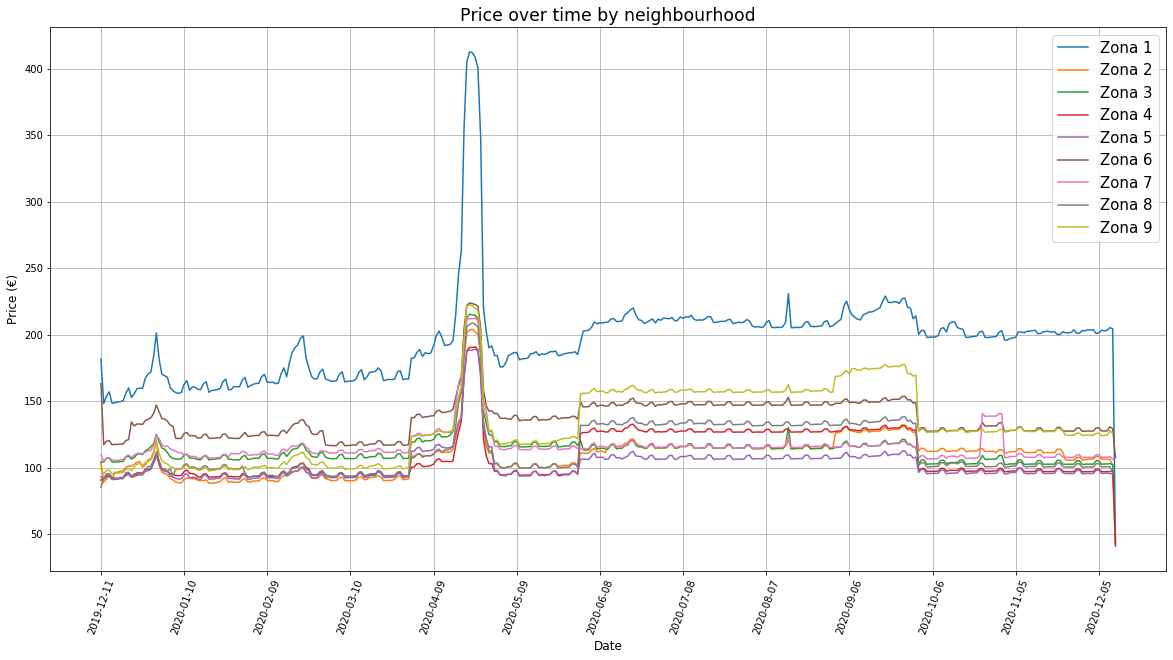

In [107]:
zones = ['Zona 1','Zona 2','Zona 3','Zona 4','Zona 5','Zona 6','Zona 7','Zona 8','Zona 9']

plt.figure(figsize=(20,10))

for zone in zones:
    df = dfcal_merged.query('neighbourhood == @zone').groupby('date')['adjusted_price'].mean().reset_index()
    plt.plot(df['date'], df['adjusted_price'], label = zone)

plt.xticks(dfcal_merged['date'].value_counts().reset_index()['index'].sort_values().tolist()[0:367:30], rotation=70)    

plt.grid()
plt.legend(prop={'size': 15})
plt.xlabel('Date', size = 'large')
plt.ylabel('Price (€)', size = 'large')
plt.title('Price over time by neighbourhood', size ='xx-large');

From the visualization we can see, other than the periodic peaks placed in the weekends, that the high season is somewhat around June-December with a very high peak in mid-April: this one is caused by Milan Furniture Fair, an international event that take place once a year all around the city.  
Also, there are peaks during Christmas and Carnival (mid February).

Zona 1 is, by far, the one with the highest price: this is unsurprising because is the historic center of the city! Zona 9 and Zona 6 are the second and third zone on average.

For the second question, i want to know how the guests are distributed during the year based on the zone, like we did for the price distribution. To do this, i will use the reviews combined with the neighbourhood column from listings.

In [108]:
dfrws.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,day
0,6400,36772,2010-04-19,94463,Hyun,I had such a great stay at 'the studio.' Fran...,2010,04,19
1,6400,227727,2011-04-16,415910,Tej,Staying at Francesca's and Alberto's place was...,2011,04,16
2,6400,1162608,2012-04-22,415910,Tej,This is my second time staying with Francesca ...,2012,04,22
3,6400,11670681,2014-04-11,8464658,Isabelle,"Ein wunderbares Zimmer mit privatem Bad/ WC, a...",2014,04,11
4,6400,11780336,2014-04-14,5427294,Hatice,"I was lucky so I have stayed with Francesca, A...",2014,04,14


In [109]:
dfrws['month-day'] = dfrws['month']+'-'+dfrws['day']

In [110]:
dfrws = dfrws.merge(dflst[['id', 'neighbourhood']], left_on='listing_id', right_on='id', suffixes=('', '_right')).drop('id_right', axis=1)

To correctly plot the distribution, we have to correct some issues regarding the date. The first one, that emerged during data wrangling, is that not every host make the house available for the whole year. The second one is that 2016 and 2012 were bissextile, so we have to add 29 february in other years.

In [111]:
dm_bis = dfrws.query('year == "2016"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')['month-day'].values.tolist()

In [112]:
dfrws2019 = dfrws.query('year == "2019"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')
dfrws2018 = dfrws.query('year == "2018"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')
dfrws2017 = dfrws.query('year == "2017"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')
dfrws2016 = dfrws.query('year == "2016"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')
dfrws2015 = dfrws.query('year == "2015"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')
dfrws2014 = dfrws.query('year == "2014"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')
dfrws2013 = dfrws.query('year == "2013"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')
dfrws2012 = dfrws.query('year == "2012"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')
dfrws2011 = dfrws.query('year == "2011"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')
dfrws2010 = dfrws.query('year == "2010"').groupby('month-day')['id'].count().reset_index().sort_values('month-day')

In [113]:
#This function will fill all the missing month-day in each separated dataframe we made.
def dayfill(df):    
    for dm in dm_bis:
        if df['month-day'].str.contains(dm).any():
            continue
        else:
            x = pd.DataFrame({'month-day': [dm], 'id': [0]})
            df = df.append(x).sort_values('month-day').reset_index(drop=True)
    return df

In [114]:
dfrws2019 = dayfill(dfrws2019)
dfrws2018 = dayfill(dfrws2018)
dfrws2017 = dayfill(dfrws2017)
dfrws2016 = dayfill(dfrws2016)
dfrws2015 = dayfill(dfrws2015)
dfrws2014 = dayfill(dfrws2014)
dfrws2013 = dayfill(dfrws2013)
dfrws2012 = dayfill(dfrws2012)
dfrws2011 = dayfill(dfrws2011)
dfrws2010 = dayfill(dfrws2010)

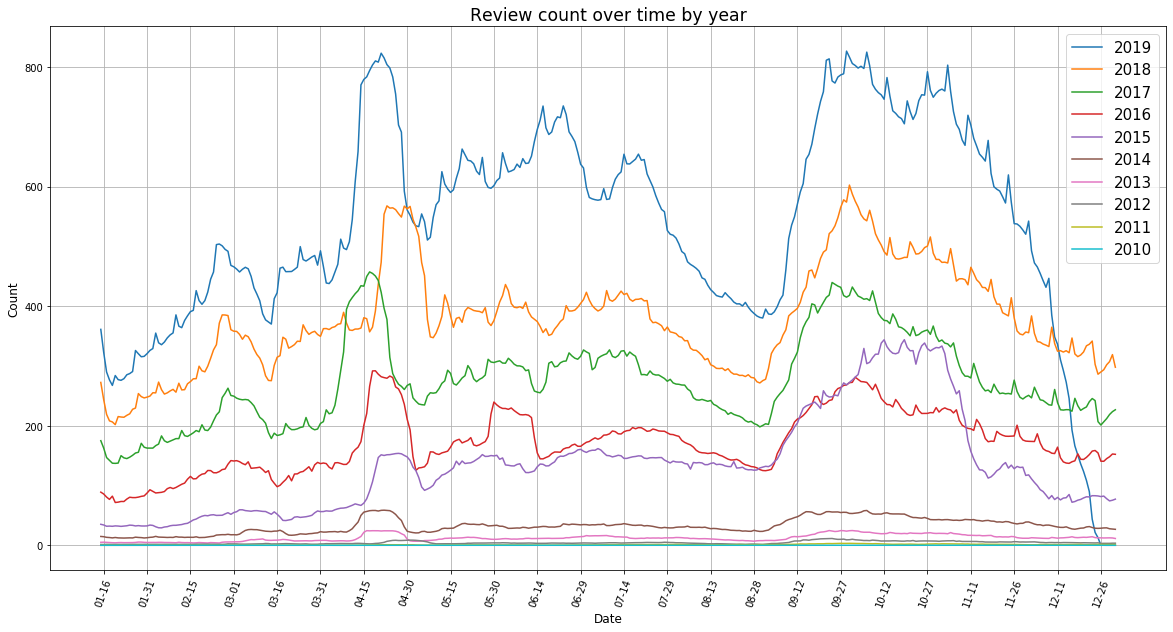

In [115]:
plt.figure(figsize=(20,10))

plt.plot(dfrws2019['month-day'], dfrws2019['id'].rolling(window=15).mean(), label = '2019')
plt.plot(dfrws2018['month-day'], dfrws2018['id'].rolling(window=15).mean(), label = '2018')
plt.plot(dfrws2017['month-day'], dfrws2017['id'].rolling(window=15).mean(), label = '2017')
plt.plot(dfrws2016['month-day'], dfrws2016['id'].rolling(window=15).mean(), label = '2016')
plt.plot(dfrws2015['month-day'], dfrws2015['id'].rolling(window=15).mean(), label = '2015')
plt.plot(dfrws2014['month-day'], dfrws2014['id'].rolling(window=15).mean(), label = '2014')
plt.plot(dfrws2013['month-day'], dfrws2013['id'].rolling(window=15).mean(), label = '2013')
plt.plot(dfrws2012['month-day'], dfrws2012['id'].rolling(window=15).mean(), label = '2012')
plt.plot(dfrws2011['month-day'], dfrws2011['id'].rolling(window=15).mean(), label = '2011')
plt.plot(dfrws2010['month-day'], dfrws2010['id'].rolling(window=15).mean(), label = '2010')

plt.xticks(dm_bis[15:367:15], rotation=70)

plt.grid()
plt.legend(prop={'size': 15})
plt.xlabel('Date', size = 'large')
plt.ylabel('Count', size = 'large')
plt.title('Review count over time by year', size ='xx-large');

From this visualization we can see that guests come more frequently during April, June and September-November. 
We can also see that tourism based on Airbnb is constantly increasing year after year.

I'd like to take a look also to the distribution in the last year, 2019, based on different zones.

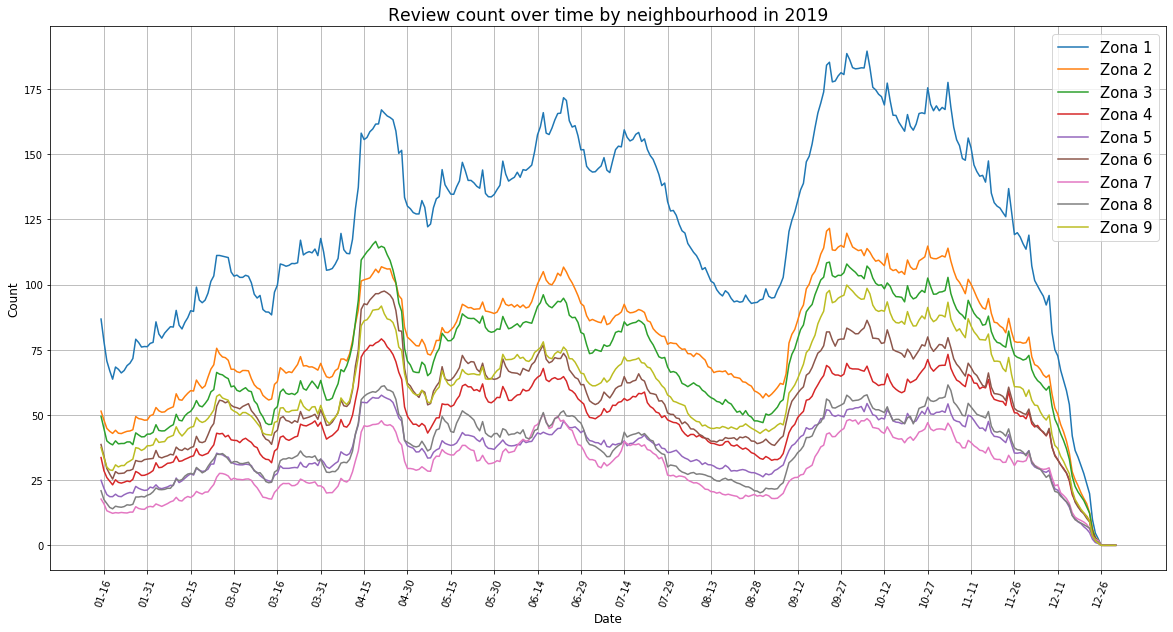

In [116]:
plt.figure(figsize=(20,10))

zones = ['Zona 1','Zona 2','Zona 3','Zona 4','Zona 5','Zona 6','Zona 7','Zona 8','Zona 9']
yr = "2019"

for zone in (zones):
    zonerew = dayfill(dfrws.query('year == @yr and neighbourhood == @zone').groupby('month-day')['id'].count().reset_index().sort_values('month-day'))
    plt.plot(zonerew['month-day'], zonerew['id'].rolling(window=15).mean(), label = zone)

plt.xticks(dm_bis[15:367:15], rotation=70)

plt.grid()
plt.legend(prop={'size': 15})
plt.xlabel('Date', size = 'large')
plt.ylabel('Count', size = 'large')
plt.title('Review count over time by neighbourhood in 2019', size ='xx-large');

For each zone the behaviour is similar, with the same peaks we saw in the visualization year by year.

### Machine Learning (Linear Regression)

For the last question, we can do some linear regression to predict the price basing on different feature we have in Listings. I mainly want to confront price with "basic" host features,like the number of bathrooms and bedrooms, neighbourhood and amenities.

In [117]:
dflst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19943 entries, 0 to 19942
Data columns (total 21 columns):
id                      19943 non-null object
name                    19943 non-null object
host_is_superhost       19943 non-null int64
neighbourhood           19943 non-null object
property_type           19943 non-null object
room_type               19943 non-null object
accommodates            19943 non-null int64
bathrooms               19943 non-null float64
bedrooms                19943 non-null float64
beds                    19943 non-null float64
bed_type                19943 non-null object
amenities               19943 non-null object
price                   19943 non-null float64
cleaning_fee            19943 non-null float64
guests_included         19943 non-null int64
extra_people            19943 non-null float64
minimum_nights          19943 non-null int64
maximum_nights          19943 non-null int64
number_of_reviews       19943 non-null int64
review_scores_rat

Of all the columns we have, amenities behave a little differently. That's because it contains a string with each amenity that's present in the house.

For example, let's look at the amenities value of the first row.

In [118]:
dflst['amenities'][0]

'{TV,Internet,Wifi,"Air conditioning","Wheelchair accessible",Kitchen,Gym,Breakfast,Elevator,Heating,"Family/kid friendly",Washer,"First aid kit",Essentials,Shampoo,"Lock on bedroom door",Hangers,Iron,"Laptop friendly workspace","Host greets you","Paid parking on premises"}'

There are a lot of different amenities and, intuitively, not every amenity is present here.  
We need to extrapolate each unique amenity from the dataset.

In [119]:
dflst_amn = dflst['amenities'].reset_index()

In [120]:
#Creating a list of each (non unique) amenity
amn = np.concatenate(dflst_amn['amenities'].str.replace('{','').str.replace('}','').str.replace('"','').str.split(',', expand=True).values.tolist())

In [121]:
#Pickin only unique values
amn_u = np.unique(amn[amn != None])

In [122]:
amn_u

array(['', ' toilet', '24-hour check-in', 'Accessible-height bed',
       'Accessible-height toilet', 'Air conditioning', 'Air purifier',
       'Alfresco bathtub', 'Amazon Echo', 'BBQ grill', 'Baby bath',
       'Baby monitor', 'Babysitter recommendations', 'Baking sheet',
       'Balcony', 'Barbecue utensils', 'Bath towel',
       'Bathroom essentials', 'Bathtub', 'Bathtub with bath chair',
       'Beach essentials', 'Beach view', 'Beachfront', 'Bed linens',
       'Bedroom comforts', 'Bidet', 'Body soap', 'Bread maker',
       'Breakfast', 'Breakfast table', 'Brick oven', 'Building staff',
       'Buzzer/wireless intercom', 'Cable TV', 'Carbon monoxide detector',
       'Cat(s)', 'Ceiling fan', 'Central air conditioning',
       'Changing table', 'Children’s books and toys',
       'Children’s dinnerware', 'Cleaning before checkout',
       'Coffee maker', 'Convection oven', 'Cooking basics', 'Crib',
       'DVD player', 'Day bed', 'Disabled parking spot',
       'Dishes and silverw

In [123]:
len(amn_u)

191

There are 191 different amenities!  
What we are trying to do is to create a table with columns equal to each amenity and rows equal to each host.

To do this, we need first to map each value in the amn_u list to create a matrix.

In [124]:
#This gives True or False for each value in amn_u
amn_mat = np.array([dflst['amenities'].map(lambda amenities: a in amenities).values for a in amn_u])

In [125]:
#Matrix transpose
amn_mat.T

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False,  True,  True],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [126]:
#Creating the dataframe from the transposed matrix
amenities = pd.DataFrame(amn_mat.T, columns = amn_u)

In [127]:
amenities.head()

,,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Alfresco bathtub,Amazon Echo,BBQ grill,...,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


If we take a look at amn_u some values are errors or empty so we are going to drop them.

In [128]:
amenities.drop(['','translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50','Other'],axis=1, inplace=True)

In [129]:
#adding id column from dflst
amenities['id'] = dflst['id']

In [130]:
amenities.head()

,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Alfresco bathtub,Amazon Echo,BBQ grill,Baby bath,...,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,id
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,6400
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,23986
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,32119
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,32649
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,37256


From a linear regression point of view, if we can group together the same "types" of amenities it is easier to have good regression and, moreover, we can avoid multicollinearity.

In [131]:
amn_groups={    'Bath towel':'Bathroom Features',
                'Bidet':'Bathroom Features',
                'En suite bathroom':'Bathroom Features',                
                'Heated towel rack':'Bathroom Features',
                'Private bathroom':'Bathroom Features',              
                'Touchless faucets':'Bathroom Features',                
    
                'Handheld shower head':'Shower',
                'Rain shower':'Shower',
                'Shower chair':'Shower',
                'Stand alone steam shower':'Shower',
                'Step-free shower':'Shower',
                'Walk-in shower':'Shower',
    
                'Bed linens':'Bedroom Features',
                'Bedroom comforts':'Bedroom Features',
                'Extra pillows and blankets':'Bedroom Features',
                'Extra space around bed':'Bedroom Features',
                'Standing valet':'Bedroom Features',
    
                'Day bed':'Bed',
                'Electric profiling bed':'Bed',
                'Firm mattress':'Bed',
                'Memory foam mattress':'Bed',
                'Murphy bed':'Bed',
                'Pillow-top mattress':'Bed',
                
                ' toilet':'Essentials',
                'Bathroom essentials':'Essentials',
                'Beach essentials':'Essentials',
                'Body soap':'Essentials',
                'Cooking basics':'Essentials',
                'Dishes and silverware':'Essentials',
                'Essentials':'Essentials',
                'Hot water':'Essentials',
                'Iron':'Essentials',
                'Kitchen':'Essentials',
                'Kitchenette':'Essentials',
                'Room-darkening shades':'Essentials',
                'Shampoo':'Essentials',
                'Shower gel':'Essentials',
                'Toilet paper':'Essentials',
                
    
                'Baby bath':'Baby Related Features',    
                'Baby monitor':'Baby Related Features',
                'Babysitter recommendations':'Baby Related Features',
                'Changing table':'Baby Related Features',
                'Children’s books and toys':'Baby Related Features',
                'Children’s dinnerware':'Baby Related Features',
                'Crib':'Baby Related Features',
                'High chair':'Baby Related Features',
                'Outlet covers':'Baby Related Features',
                'Pack ’n Play/travel crib':'Baby Related Features',
                'Stair gates':'Baby Related Features',
                'Table corner guards':'Baby Related Features',
                'Window guards':'Baby Related Features',
    
                'Dishwasher':'Cleaning Features',
                'Dryer':'Cleaning Features',
                'Trash can':'Cleaning Features',
                'Washer':'Cleaning Features',
                'Washer / Dryer':'Cleaning Features',
    
                'Cleaning before checkout':'Host Services',
                'Host greets you':'Host Services',
                'Luggage dropoff allowed':'Host Services',
                'Self check-in':'Host Services',
                '24-hour check-in':'Host Services',                
    
                'Exercise equipment':'Fitness',
                'Gym':'Fitness',
                'Private gym':'Fitness',                
    
                'Baking sheet':'Cooking/Kitchen Features',
                'Barbecue utensils':'Cooking/Kitchen Features',
                'Breakfast table':'Cooking/Kitchen Features',
                'Full kitchen':'Cooking/Kitchen Features',
                'Mini fridge':'Cooking/Kitchen Features',
                'Oven':'Cooking/Kitchen Features',
                'Refrigerator':'Cooking/Kitchen Features',
                'Wine cooler':'Cooking/Kitchen Features',    
                'Double oven':'Cooking/Kitchen Features',
                'BBQ grill':'Cooking/Kitchen Features',
                'Bread maker':'Cooking/Kitchen Features',
                'Brick oven':'Cooking/Kitchen Features',
                'Convection oven':'Cooking/Kitchen Features',
                'Gas oven':'Cooking/Kitchen Features',
                'Microwave':'Cooking/Kitchen Features',
                'Steam oven':'Cooking/Kitchen Features',
                'Stove':'Cooking/Kitchen Features',
                'Warming drawer':'Cooking/Kitchen Features',    
                'Espresso machine':'Cooking/Kitchen Features',  
                'Coffee maker':'Cooking/Kitchen Features',  
                'Hot water kettle':'Cooking/Kitchen Features',  
    
                'Building staff':'Security Features',
                'Buzzer/wireless intercom':'Security Features',
                'Carbon monoxide detector':'Security Features',
                'Doorman':'Security Features',
                'Fire extinguisher':'Security Features',
                'Fireplace guards':'Security Features',
                'Keypad':'Security Features',
                'Lock on bedroom door':'Security Features',
                'Lockbox':'Security Features',
                'Safety card':'Security Features',
                'Smart lock':'Security Features',
                'Smoke detector':'Security Features',
    
                'Cat(s)':'Pet Friendly',
                'Dog(s)':'Pet Friendly',
                'Other pet(s)':'Pet Friendly',
                'Pets allowed':'Pet Friendly',
                'Pets live on this property':'Pet Friendly',
    
                'Cable TV':'TV/Entertainment Related',
                'DVD player':'TV/Entertainment Related',
                'Game console':'TV/Entertainment Related',
                'HBO GO':'TV/Entertainment Related',
                'Netflix':'TV/Entertainment Related',
                'Projector and screen':'TV/Entertainment Related',
                'Smart TV':'TV/Entertainment Related',
                'Sound system':'TV/Entertainment Related',
                'TV':'TV/Entertainment Related',                
    
                'Balcony':'Outdoors Features',
                'Beach view':'Outdoors Features',
                'Beachfront':'Outdoors Features',
                'Garden or backyard':'Outdoors Features',
                'Lake access':'Outdoors Features',
                'Mountain view':'Outdoors Features',
                'Outdoor seating':'Outdoors Features',
                'Patio or balcony':'Outdoors Features',
                'Ski-in/Ski-out':'Outdoors Features',
                'Sun loungers':'Outdoors Features',
                'Terrace':'Outdoors Features',
                'Waterfront':'Outdoors Features',
                
                'Accessible-height bed':'Accessibility Features',
                'Accessible-height toilet':'Accessibility Features',
                'Disabled parking spot':'Accessibility Features',
                'Elevator':'Accessibility Features',
                'Fixed grab bars for shower':'Accessibility Features',
                'Fixed grab bars for toilet':'Accessibility Features',
                'Flat path to guest entrance':'Accessibility Features',
                'Ground floor access':'Accessibility Features',
                'Mobile hoist':'Accessibility Features',
                'No stairs or steps to enter':'Accessibility Features',
                'Wheelchair accessible':'Accessibility Features',
                'Wide clearance to shower':'Accessibility Features',
                'Wide doorway to guest bathroom':'Accessibility Features',
                'Wide entrance':'Accessibility Features',
                'Wide entrance for guests':'Accessibility Features',
                'Wide entryway':'Accessibility Features',
                'Wide hallways':'Accessibility Features',
                
                'Air conditioning':'Temperature Control Features',
                'Air purifier':'Temperature Control Features',
                'Ceiling fan':'Temperature Control Features',
                'Central air conditioning':'Temperature Control Features',
                'Heated floors':'Temperature Control Features',
                'Heating':'Temperature Control Features',
                'Indoor fireplace':'Temperature Control Features',
    
                'Ethernet connection':'Connectivity',
                'Fax machine':'Connectivity',
                'Internet':'Connectivity',
                'Laptop friendly workspace':'Connectivity',
                'Pocket wifi':'Connectivity',
                'Printer':'Connectivity',
                'Wifi':'Connectivity',
                'Amazon Echo':'Connectivity',
                'High-resolution computer monitor':'Connectivity',    
    
                'Alfresco bathtub':'Bathtub',                
                'Bathtub':'Bathtub',
                'Bathtub with bath chair':'Bathtub',
                'Hot tub':'Bathtub',
                'Jetted tub':'Bathtub',
                'Private hot tub':'Bathtub',
                'Soaking tub':'Bathtub',
    
                'Free parking on premises':'Parking',
                'Free street parking':'Parking',
                'Outdoor parking':'Parking',
                'EV charger':'Parking',
                'Paid parking off premises':'Parking',
                'Paid parking on premises':'Parking',
    
                'Pool':'Pool Features', 
                'Pool cover':'Pool Features', 
                'Pool with pool hoist':'Pool Features', 
    
                'Mudroom':'Entrance',
                'Private entrance':'Entrance',
                'Well-lit path to entrance':'Entrance'

}

Not every amenity is grouped since some are uncategorizable.

Using melt function we can recode the database and replace each amenity with the group present in the dictionary we built in the last step.

In [132]:
amn_melt = amenities.melt(id_vars=['id'], var_name='amenity')
amn_melt

,id,amenity,value
0,6400,toilet,False
1,23986,toilet,False
2,32119,toilet,False
3,32649,toilet,False
4,37256,toilet,False
...,...,...,...
3729336,40748756,Wine cooler,False
3729337,40749095,Wine cooler,False
3729338,40749412,Wine cooler,False
3729339,40749826,Wine cooler,False


In [133]:
amn_melt['amenity'] = amn_melt['amenity'].replace(amn_groups)

In [134]:
amn_melt.head()

,id,amenity,value
0,6400,Essentials,False
1,23986,Essentials,False
2,32119,Essentials,False
3,32649,Essentials,False
4,37256,Essentials,False


Lastly, we can use a pivot table to create the table we were looking for, with amenities as columns.

In [135]:
amenities = amn_melt.pivot_table(index='id', columns='amenity', values='value', aggfunc='max')

In [136]:
amenities.head()

amenity,Accessibility Features,Baby Related Features,Bathroom Features,Bathtub,Bed,Bedroom Features,Breakfast,Cleaning Features,Connectivity,Cooking/Kitchen Features,...,Pool Features,Private living room,Sauna,Security Features,Shower,Single level home,Smoking allowed,Suitable for events,TV/Entertainment Related,Temperature Control Features
id,,,,,,,,,,,,,,,,,,,,,
10006940,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,False,False,False,False,True,True
10009973,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
10010252,True,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,True,True
10017505,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1001862,True,False,False,False,False,False,False,True,True,False,...,False,False,False,True,False,False,False,False,True,True


In [137]:
amenities.replace({True: 1, False: 0}, inplace=True)

In [138]:
amenities.shape

(19943, 33)

To proceed with machine learning, we are going to drop unneded columns.

In [139]:
dflst_ml = dflst.drop(['name','amenities','number_of_reviews','review_scores_rating','minimum_nights','maximum_nights'], axis=1)

In [140]:
dflst_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19943 entries, 0 to 19942
Data columns (total 15 columns):
id                   19943 non-null object
host_is_superhost    19943 non-null int64
neighbourhood        19943 non-null object
property_type        19943 non-null object
room_type            19943 non-null object
accommodates         19943 non-null int64
bathrooms            19943 non-null float64
bedrooms             19943 non-null float64
beds                 19943 non-null float64
bed_type             19943 non-null object
price                19943 non-null float64
cleaning_fee         19943 non-null float64
guests_included      19943 non-null int64
extra_people         19943 non-null float64
instant_bookable     19943 non-null int64
dtypes: float64(6), int64(4), object(5)
memory usage: 2.3+ MB


In the same fashion as amenities, we can recode property_type, room_type, bed_type grouping values with low count in "Other" category.

In [141]:
dflst_ml['property_type'].value_counts()

Apartment                 16169
Condominium                1562
Loft                       1078
House                       466
Serviced apartment          184
Bed and breakfast           131
Villa                        61
Guest suite                  47
Boutique hotel               43
Tiny house                   37
Townhouse                    34
Other                        31
Hostel                       27
Aparthotel                   23
Hotel                        19
Guesthouse                   17
Camper/RV                     4
Dome house                    2
Farm stay                     2
Cave                          2
Vacation home                 1
Casa particular (Cuba)        1
Chalet                        1
Island                        1
Name: property_type, dtype: int64

In [142]:
dflst_ml['room_type'].value_counts()

Entire home/apt    14958
Private room        4506
Shared room          315
Hotel room           164
Name: room_type, dtype: int64

In [143]:
dflst_ml['bed_type'].value_counts()

Real Bed         19376
Pull-out Sofa      474
Futon               70
Couch               14
Airbed               9
Name: bed_type, dtype: int64

In [144]:
for n in range(len(dflst_ml)):
    if dflst_ml['property_type'][n] not in ['Apartment', 'Condominium','Loft','House']:
        dflst_ml.at[n, 'property_type'] = 'Other'

In [145]:
for n in range(len(dflst_ml)):
    if dflst_ml['room_type'][n] not in ['Entire home/apt']:
        dflst_ml.at[n, 'room_type'] = 'Other'

In [146]:
for n in range(len(dflst_ml)):
    if dflst_ml['bed_type'][n] not in ['Real Bed']:
        dflst_ml.at[n, 'bed_type'] = 'Other'

We proceed to create two different tables with dummies: one for property, room and bed type and the other for neighbourhood.

In [147]:
dummies_prb = pd.get_dummies(dflst_ml[['property_type','room_type','bed_type']])
dflst_ml.drop(['property_type','room_type','bed_type'], axis=1, inplace=True)

In [148]:
dummies_nbr = pd.get_dummies(dflst_ml[['neighbourhood']])
dflst_ml.drop(['neighbourhood'], axis=1, inplace=True)

Let's start looking at the first linear regression, using only the values present in dflst_ml.

In [149]:
#Split into explanatory and response variables
X = dflst_ml.drop(['id','price'], axis=1)
y = dflst_ml['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
mean_sq_error = mean_squared_error(y_test, y_test_preds)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))
print("The root mean squared error for your model was {}".format(mean_sq_error**0.5))

The r-squared score for your model was 0.08472040747321985 on 5983 values.
The root mean squared error for your model was 160.4106848912051


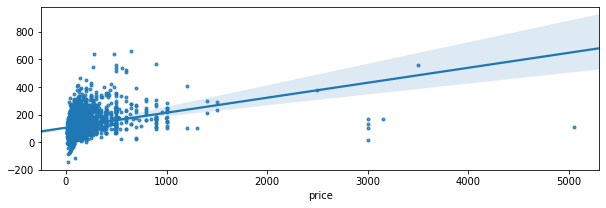

In [150]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_test_preds, marker='.');

In [151]:
pd.DataFrame(lm_model.coef_, X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)

,Coefficient
bedrooms,45.266967
bathrooms,43.641463
accommodates,32.843243
instant_bookable,9.137781
extra_people,0.076237
cleaning_fee,-0.022429
guests_included,-9.554229
beds,-30.576954
host_is_superhost,-41.508239


The R-squared score is really low and looking at the regression plot we have a really high density of points between 0 and 1000 and a little more on higher prices.  
I want to look at two different solution to improve the results: the first is to consider prices over 1500 as outliers (they are few and actually really out of place considering the rest of our values) and the second is to transform prices to logarithmic.

In [152]:
len(dflst_ml[dflst_ml['price']<1500])/len(dflst_ml['price'])

0.9984455698741413

In [153]:
dflst_ml_red = dflst_ml[dflst_ml['price']<1500]

In [154]:
#Split into explanatory and response variables
X = dflst_ml_red.drop(['id','price'], axis=1)
y = dflst_ml_red['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
mean_sq_error = mean_squared_error(y_test, y_test_preds)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))
print("The root mean squared error for your model was {}".format(mean_sq_error**0.5))

The r-squared score for your model was 0.13027580672679995 on 5974 values.
The root mean squared error for your model was 110.64744312260528


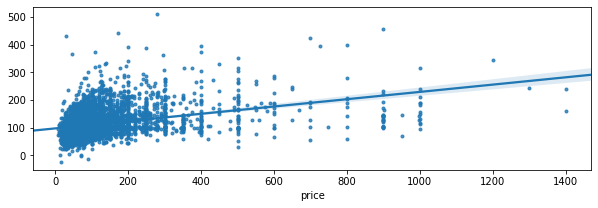

In [155]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_test_preds, marker='.');

In [156]:
pd.DataFrame(np.exp(lm_model.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)

,Coefficient
bathrooms,2.319161e+18
accommodates,4.784572e+09
bedrooms,1.291314e+08
instant_bookable,1.442764e+02
cleaning_fee,9.466986e-01
extra_people,9.422784e-01
guests_included,1.268291e-01
beds,6.512396e-07
host_is_superhost,2.879414e-16


The model has improved a little but still present an high density of values in the 0-400 price delta and looking at the coefficients they seem really messed up.  
Let's see if the logarithmic scale for prices will have better results.

In [157]:
#Split into explanatory and response variables
X = dflst_ml.drop(['id','price'], axis=1)
y = np.log(dflst_ml['price'])

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
mean_sq_error = mean_squared_error(y_test, y_test_preds)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))
print("The root mean squared error for your model was {}".format(mean_sq_error**0.5))

The r-squared score for your model was 0.19041281262453047 on 5983 values.
The root mean squared error for your model was 0.6222113040273992


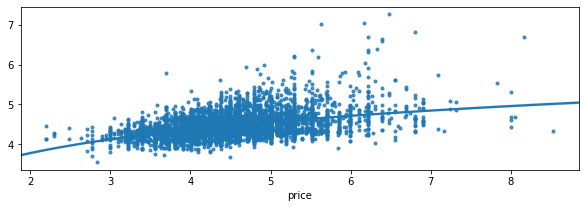

In [158]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_test_preds, logx=True, marker='.');

In [159]:
pd.DataFrame(np.exp(lm_model.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)

,Coefficient
accommodates,1.180981
bathrooms,1.175431
bedrooms,1.101462
instant_bookable,1.033409
cleaning_fee,1.001268
extra_people,0.999751
guests_included,0.988855
beds,0.922042
host_is_superhost,0.790750


This is indeed a better regression. It is still far from perfection (improved but still low R-squared value) but the regression plot and the coefficients are more reasonable.

From now on every regression is made with prices transformed to logarithmic.

Let's look now at the regression including other factors.  
Are different neighbourhood important to host pricing?

In [160]:
#merged dflst_ml with  the dummies neighbourhood table we prepared earlier
dflst_ml.merge(dummies_nbr, how='left',left_index=True, right_index=True)

,id,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,instant_bookable,neighbourhood_Zona 1,neighbourhood_Zona 2,neighbourhood_Zona 3,neighbourhood_Zona 4,neighbourhood_Zona 5,neighbourhood_Zona 6,neighbourhood_Zona 7,neighbourhood_Zona 8,neighbourhood_Zona 9
0,6400,0,1,3.5,3.0,1.0,100.0,0.0,1,52.0,0,0,0,0,0,1,0,0,0,0
1,23986,0,4,1.0,1.0,2.0,150.0,25.0,2,25.0,0,0,0,0,0,0,1,0,0,0
2,32119,0,4,1.0,1.0,4.0,75.0,0.0,2,10.0,0,0,1,0,0,0,0,0,0,0
3,32649,0,4,1.0,1.0,3.0,70.0,0.0,2,5.0,0,0,1,0,0,0,0,0,0,0
4,37256,1,1,1.0,1.0,1.0,55.0,20.0,1,0.0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19938,40748756,0,4,1.0,1.0,1.0,21.0,0.0,1,0.0,1,0,1,0,0,0,0,0,0,0
19939,40749095,0,4,1.0,1.0,1.0,21.0,0.0,1,0.0,1,0,1,0,0,0,0,0,0,0
19940,40749412,0,4,1.0,1.0,1.0,21.0,0.0,1,0.0,1,0,1,0,0,0,0,0,0,0
19941,40749826,0,2,1.5,0.0,1.0,27.0,15.0,1,10.0,1,0,1,0,0,0,0,0,0,0


In [161]:
#Split into explanatory and response variables
X = dflst_ml.merge(dummies_nbr, how='left',left_index=True, right_index=True).drop(['id','price'], axis=1)
y = np.log(dflst_ml.merge(dummies_nbr, how='left',left_index=True, right_index=True)['price'])

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
mean_sq_error = mean_squared_error(y_test, y_test_preds)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))
print("The root mean squared error for your model was {}".format(mean_sq_error**0.5))

The r-squared score for your model was 0.2446516312702982 on 5983 values.
The root mean squared error for your model was 0.6010072784623759


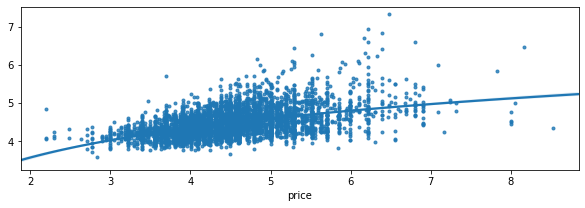

In [162]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_test_preds, logx=True, marker='.');

In [163]:
pd.DataFrame(np.exp(lm_model.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)

,Coefficient
neighbourhood_Zona 1,1.408944
accommodates,1.172351
bathrooms,1.145209
bedrooms,1.108474
neighbourhood_Zona 6,1.017428
instant_bookable,1.008971
cleaning_fee,1.000745
extra_people,0.999327
guests_included,0.987446
neighbourhood_Zona 3,0.950531


The model improved further with the inclusion of neighbourhood zones. Looking at the coefficients, Zona 1 stands out (unsurprisingly) as the pricest zone in the city.

In the same way we did for neighbourhood, we now look at the regression including property, room and bed type dummy table.

In [164]:
#Split into explanatory and response variables
X = dflst_ml.merge(dummies_prb, how='left',left_index=True, right_index=True).drop(['id','price'], axis=1)
y = np.log(dflst_ml.merge(dummies_prb, how='left',left_index=True, right_index=True)['price'])

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
mean_sq_error = mean_squared_error(y_test, y_test_preds)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))
print("The root mean squared error for your model was {}".format(mean_sq_error**0.5))

The r-squared score for your model was 0.24366975296697868 on 5983 values.
The root mean squared error for your model was 0.6013977766633959


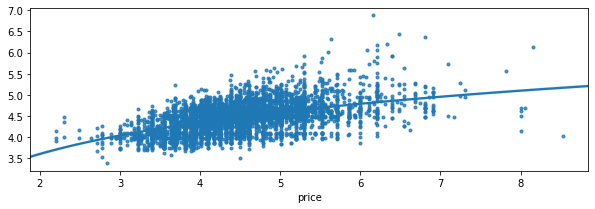

In [165]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_test_preds, logx=True, marker='.');

In [166]:
pd.DataFrame(np.exp(lm_model.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)

,Coefficient
property_type_Other,1.294078
room_type_Entire home/apt,1.217492
bathrooms,1.217065
bedrooms,1.148076
accommodates,1.116815
bed_type_Real Bed,1.063569
property_type_House,1.051940
property_type_Loft,1.013113
instant_bookable,1.007553
extra_people,1.000305


The model present the same improvement we saw when it was included the neighbourhood, with the highest coefficients in Entire home/apt and the "Other" property type (which includes some of the pricest types of properties).

As we saw, both dummy table have improved the regression considerably. Let's look if the joined table with both neighbourhood and property/room/bed types have a greater improvement.

In [167]:
ml_merge = dflst_ml.merge(dummies_nbr, how='left',left_index=True, right_index=True)

In [168]:
#Split into explanatory and response variables
X = ml_merge.merge(dummies_prb, how='left',left_index=True, right_index=True).drop(['id','price'], axis=1)
y = np.log(ml_merge.merge(dummies_prb, how='left',left_index=True, right_index=True)['price'])

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
mean_sq_error = mean_squared_error(y_test, y_test_preds)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))
print("The root mean squared error for your model was {}".format(mean_sq_error**0.5))

The r-squared score for your model was 0.2898250300905585 on 5983 values.
The root mean squared error for your model was 0.5827586982106622


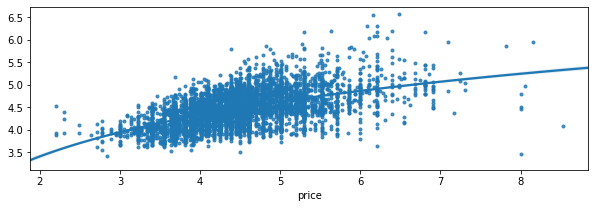

In [169]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_test_preds, logx=True, marker='.');

In [170]:
pd.DataFrame(np.exp(lm_model.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)

,Coefficient
neighbourhood_Zona 1,1.387735
property_type_Other,1.252560
room_type_Entire home/apt,1.204127
bathrooms,1.184200
bedrooms,1.152240
accommodates,1.112326
property_type_House,1.069138
bed_type_Real Bed,1.063772
property_type_Loft,1.022569
neighbourhood_Zona 6,1.017423


It actually does improve! We have better R-squared coefficients, a little lower root mean squared error and the coefficients are reasonable considering what they really represent.  

Let's do the regression with our last "dummy" table, the amenities one. I will do it joining the dummies with the dflst_ml database first to see if there is an improvement.

In [171]:
#Split into explanatory and response variables
X = dflst_ml.merge(amenities, how='left',left_on='id', right_on='id').drop(['id','price'], axis=1)
y = np.log(dflst_ml.merge(amenities, how='left',left_on='id', right_on='id')['price'])

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
mean_sq_error = mean_squared_error(y_test, y_test_preds)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))
print("The root mean squared error for your model was {}".format(mean_sq_error**0.5))

The r-squared score for your model was 0.2319461322104608 on 5983 values.
The root mean squared error for your model was 0.6060408853603582


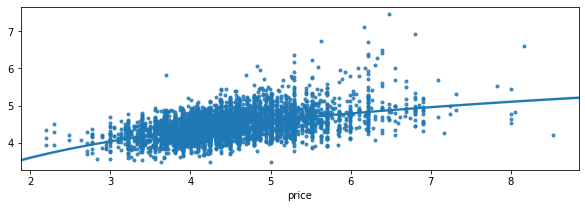

In [172]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_test_preds, logx=True, marker='.');

In [173]:
pd.DataFrame(np.exp(lm_model.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)

,Coefficient
Bathroom Features,1.333356
TV/Entertainment Related,1.235422
Pool Features,1.230228
Fitness,1.196950
accommodates,1.174065
bathrooms,1.164080
Breakfast,1.107626
bedrooms,1.101298
Temperature Control Features,1.096813
Entrance,1.075594


Like what we saw with the first two dummy table, the model improved again. The features regarding bathroom, TV/entertainment, Pool and fitness are the one that increases more the price.

Our final regression will be the one with all our variables included.

In [174]:
ml_merge = ml_merge.merge(dummies_prb, how='left',left_index=True, right_index=True)

In [175]:
#Split into explanatory and response variables
X = ml_merge.merge(amenities, how='left',left_on='id', right_on='id').drop(['id','price'], axis=1)
y = np.log(ml_merge.merge(amenities, how='left',left_on='id', right_on='id')['price'])

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
mean_sq_error = mean_squared_error(y_test, y_test_preds)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))
print("The root mean squared error for your model was {}".format(mean_sq_error**0.5))

The r-squared score for your model was 0.3214610831540309 on 5983 values.
The root mean squared error for your model was 0.5696308009116007


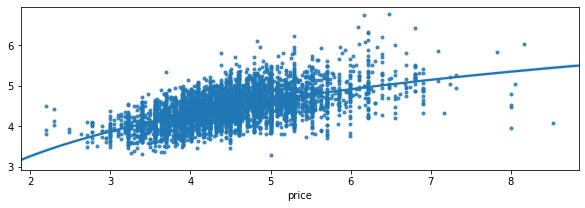

In [176]:
fig = plt.figure(figsize=(10,3))
sns.regplot(y_test,y_test_preds, logx=True, marker='.');

In [177]:
pd.DataFrame(np.exp(lm_model.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)

,Coefficient
Pool Features,1.251003
Fitness,1.246416
Bathroom Features,1.200129
bathrooms,1.164540
TV/Entertainment Related,1.144472
bedrooms,1.140827
Formal dining area,1.134684
Breakfast,1.128542
accommodates,1.115976
Bathtub,1.072330


The model improved but with unexpected results regarding coefficients. From this regression it seems that amenities weights a lot higher than neighbourhood/property/room/bed type to the point that the increase in price is zero.  
This is unlikely and probably is due to some interaction factors between variables.  
  
Still, R-squared is now 0.32 which is indeed far from perfection but is greatly improved from the 0.13 we had in the first regression (not considering the regression without logarithmic transformation) so we are definitely on the right track.

I'd like, as a last step that maybe will help for future improvement of this model, to possible correlations between variables in the final merged table.

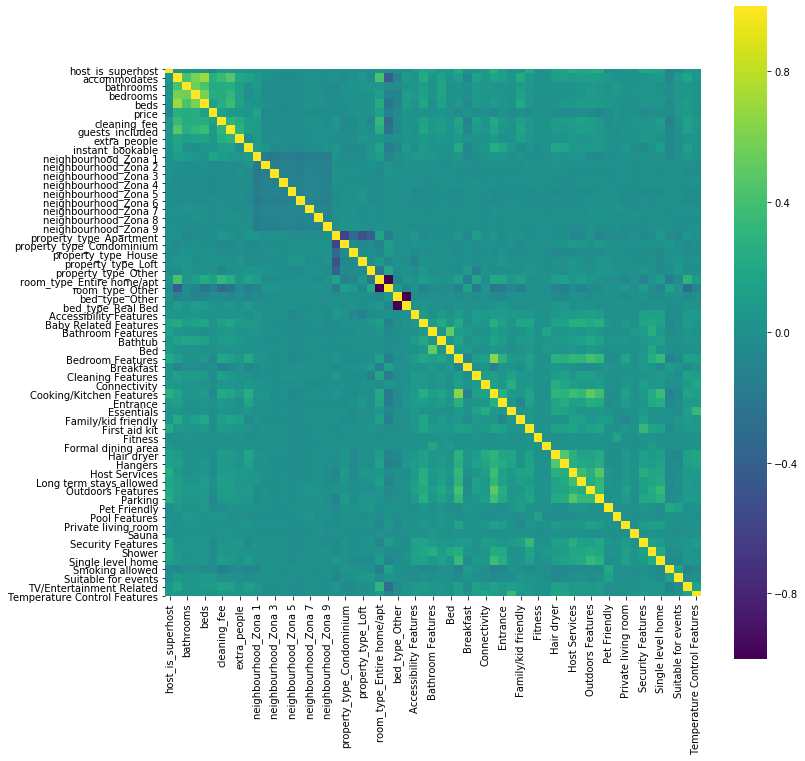

In [178]:
fig = plt.figure(figsize= (12,12))
sns.heatmap(ml_merge.merge(amenities, how='left',left_on='id', right_on='id').drop(['id'], axis=1).corr(), annot=False, vmax=1, cmap='viridis', square=True);

Of all the variables, there is some mild correlation between accomodates, bathrooms, bedrooms and beds.  
This will be, for sure, the first step of future integration and variation of the model. 

# Conclusions

To finally answer our questions we can conclude that:  

1) Each neighbourhood follows the same patterns during the year, with small peaks during the weekends and a major peak during april. There is also an increase in pricing between June and December and during Christmas and Carnival weeks.  The most profitable neighbourhood are Zona 1 (historic center, by a large amount), Zona 9 and Zona 6.

2) During the course of the years (2010-2019) the number of guests has increased steadily, mantaining the same peaks and high season. In particular we have a peak during April (as we saw in price trending), a peak at June (followed by a small peak in July) and a large peak from September to November.  We can say that, exluding the peak at April (caused by a specific event) and August, the high season is from June to November.

3) If we limit our analysis to the last year, 2019, guests stayed the most in Zona 1, Zona 2 e Zona 3.

4) In general, from our data it is clear that the most profitable neighborhood is Zone 1 but if we combine what we have obtained from our analysis Zone 9 is the runner up.

5) Price predicting wise we had bitter sweet results. Taking the different features separately we have found with linear regression a model with an R-Squared value of about 0.24 and reasonable coefficients. Combining property, room and bed features we improved our model to about 0.29 and again reasonable coefficients. But when we united all the features in an unique regression, amenities made other features irrelevant still having a further improvement in R-Squared to 0.32. This is probably due to some interaction between features or, probably, to higher order factors.

Starting from here, i want to try in the future other machine learning models in search for a better regression.